In [1235]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.append("/Users/maia/Projects/brownian-manifold/")
sys.path.append("/Users/maia/Projects/thesis-code/drift_fn_models")
# from brownian_manifold.manifold import Manifold
from brownian import brownian
from sklearn.metrics.pairwise import cosine_similarity
from numpy.fft import fft, ifft, fftshift
import scipy
from sklearn.decomposition import PCA


In [929]:
%matplotlib notebook

In [672]:
def uniform_sphere_drift_ctxts_20():
    slen = 20
    theta = 2 * np.pi * np.random.random()
    phi = 2 * np.pi * np.random.random()
    beta = 2 * np.pi / slen
    ax = np.array([0, 0, 1])
    ctxts = np.zeros((slen, 3))
    for i in range(slen):
        v = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])
        ctxts[i] = v
        b = np.cos(beta) * v + np.sin(beta) * (ax * v) + (np.dot(ax, v)) * (1 - np.cos(beta)) * v
        theta = np.arctan2(np.sqrt(b[0]**2 + b[1]**2), b[2])
        phi = np.arctan2(b[1], b[0])
    return ctxts


def uniform_sphere_drift_ctxts():
    slen = 20
    theta = 2 * np.pi * np.random.random()
    phi = 2 * np.pi * np.random.random()
    theta_d = 2 * np.pi / slen / 2
    phi_d = 2 * np.pi / slen / 2
    ctxts = np.zeros((slen, 3))
    for i in range(slen):
        v = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])
        theta += theta_d
        phi += phi_d
        ctxts[i] = v
    return ctxts

In [673]:
# sphere_manifold = Manifold(manifold='sphere',
#                            radius_sphere=1,
#                            final_time=137.5,
#                            n_steps=10000,
#                            plt_interactive=False)
# sphere_simdata = sphere_manifold.simulate_brownian_sphere()
# print(len(sphere_simdata))

# def brownian_sphere_drift_ctxts_20(sphere_idx):
#     return sphere_simdata[sphere_idx:sphere_idx + 20]

# np.save("brownian_sim", sphere_simdata)


In [674]:
brownian_data = np.load("brownian_sim.npy")
    

In [675]:

ctxt = brownian_data[:100]



<IPython.core.display.Javascript object>


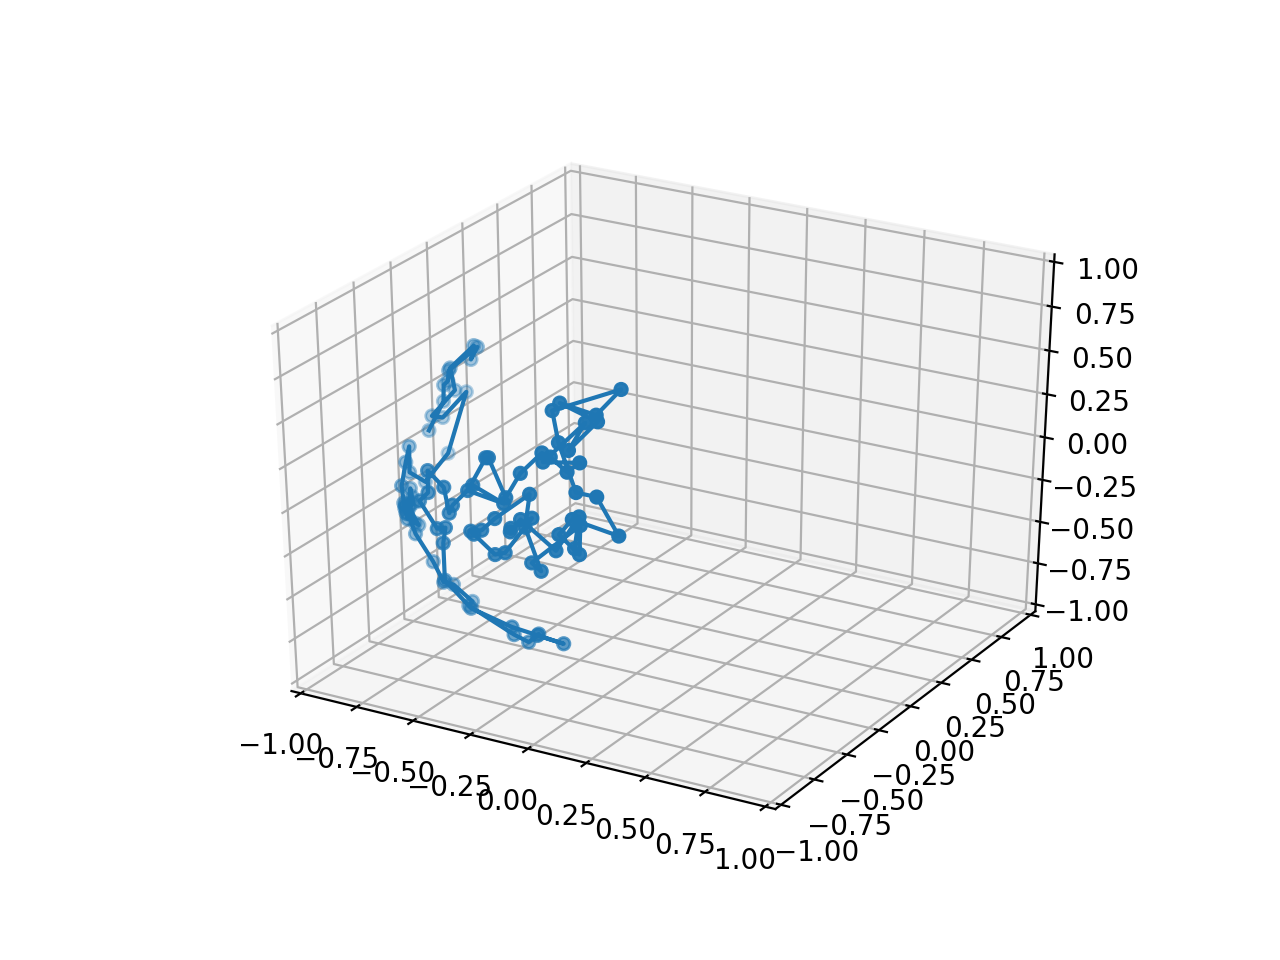

In [187]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
ax.scatter(ctxt[:,0], ctxt[:,1], ctxt[:,2])
ax.plot(ctxt[:,0], ctxt[:,1], ctxt[:,2])

<IPython.core.display.Javascript object>


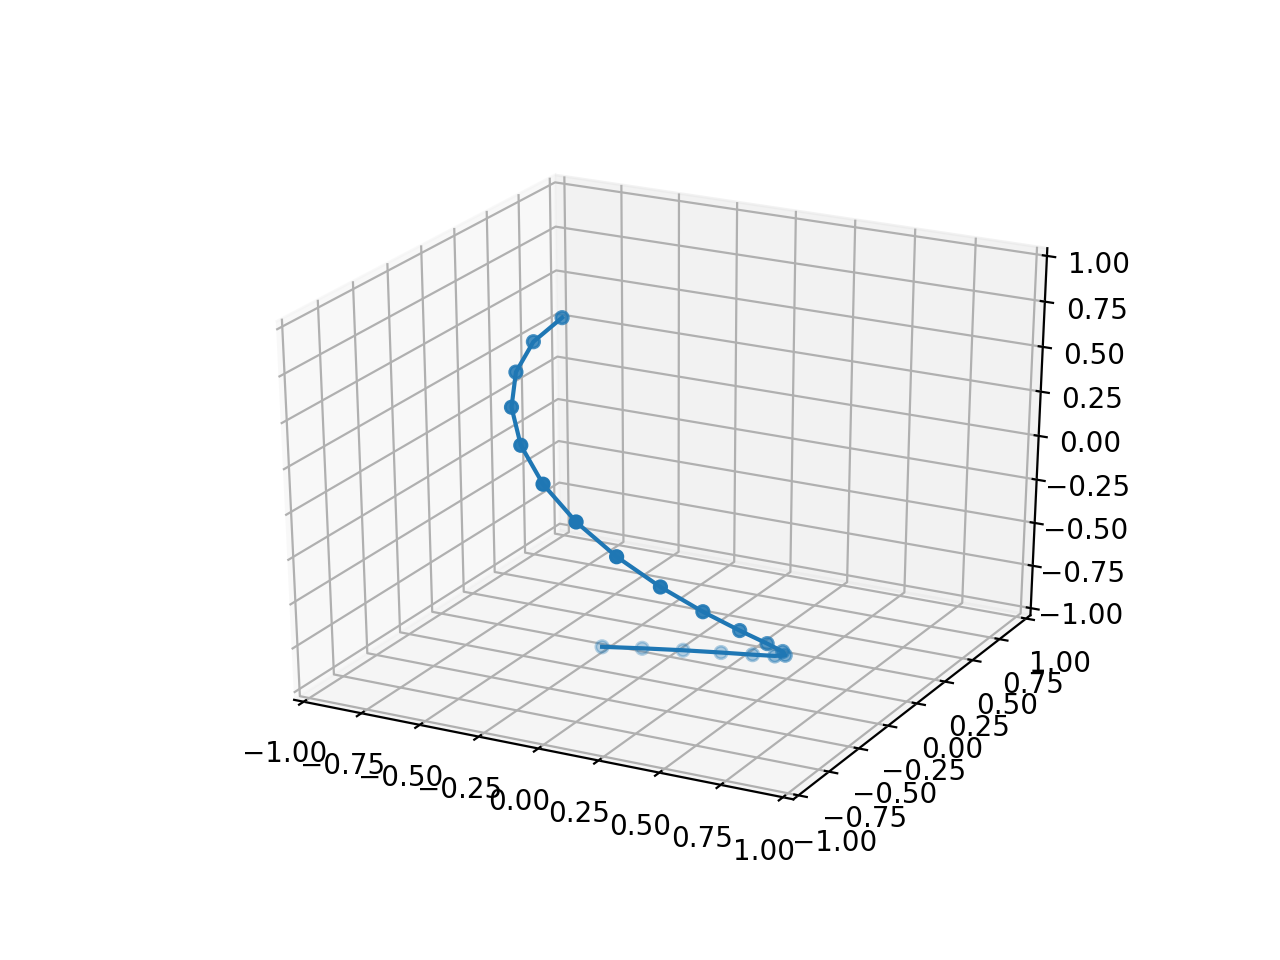

In [15]:
ctxt = uniform_sphere_drift_ctxts()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
ax.scatter(ctxt[:,0], ctxt[:,1], ctxt[:,2])
ax.plot(ctxt[:,0], ctxt[:,1], ctxt[:,2])


In [188]:
def circular_drift_ctxts():
    slen = 20
    theta = 2 * np.pi * np.random.random()
    phi = 2 * np.pi * np.random.random()
    theta_d = 2 * np.pi / (slen * 2)
    phi_d = 2 * np.pi / slen / 2
    ctxts = np.zeros((slen, 3))
    for i in range(slen):
        v = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])
        theta += theta_d
        ctxts[i] = v
    return ctxts

<IPython.core.display.Javascript object>


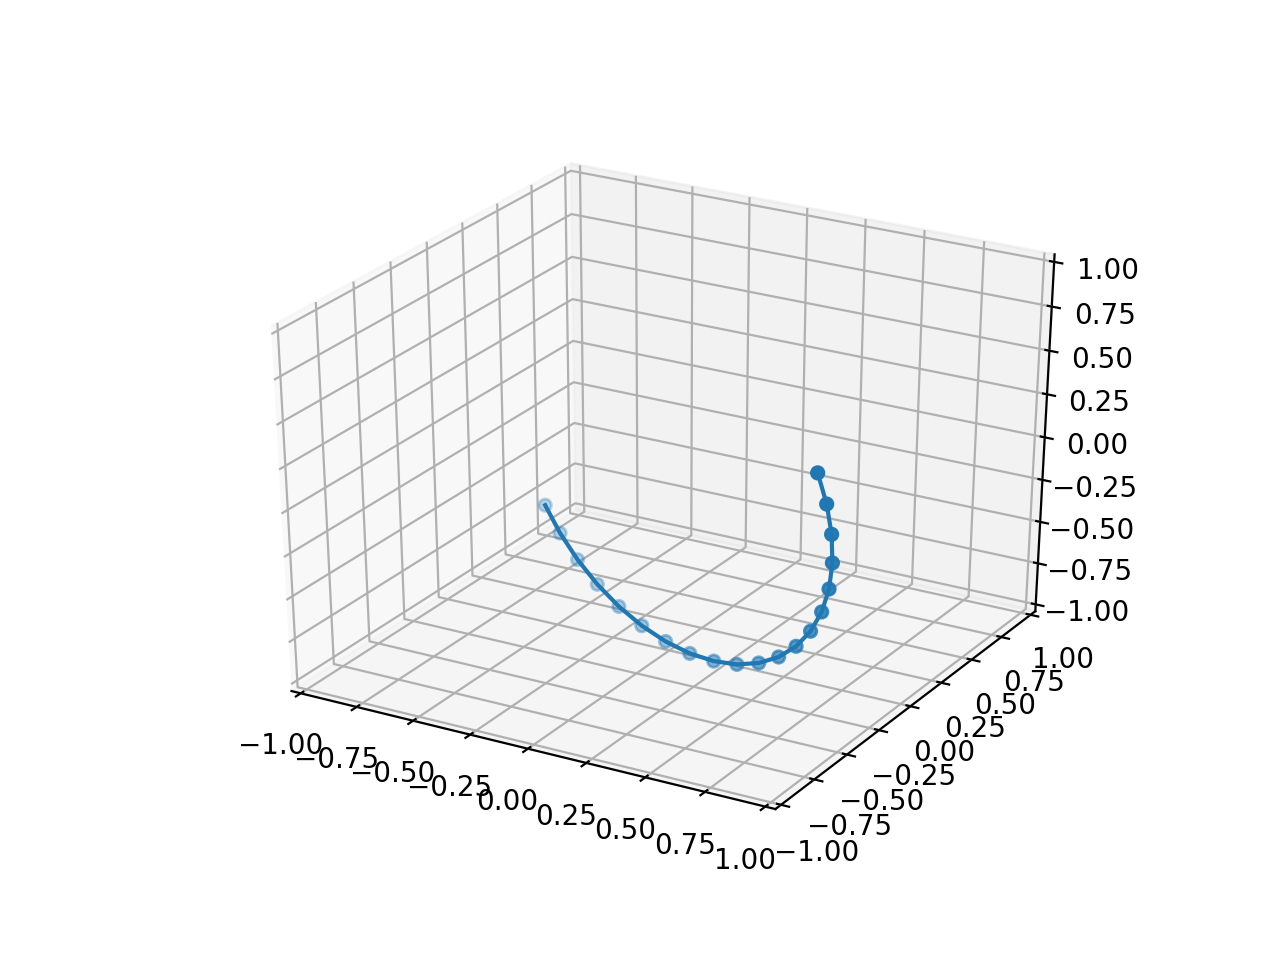

In [189]:
ctxt = circular_drift_ctxts()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
ax.scatter(ctxt[:,0], ctxt[:,1], ctxt[:,2])
ax.plot(ctxt[:,0], ctxt[:,1], ctxt[:,2])

In [19]:
def noisy_arc_drift_ctxts():
    slen = 20
    noise_sf = 2 * np.pi / 20
    theta = 2 * np.pi * np.random.random()
    phi = 2 * np.pi * np.random.random()
    theta_d = 2 * np.pi / (slen * 2)
    ctxts = np.zeros((slen, 3))
    for i in range(slen):
        v = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])
        theta += theta_d + ((np.random.random() - 0.5) * noise_sf)
        ctxts[i] = v
    return ctxts

In [190]:
ctxt = noisy_arc_drift_ctxts()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
ax.scatter(ctxt[:,0], ctxt[:,1], ctxt[:,2])
ax.plot(ctxt[:,0], ctxt[:,1], ctxt[:,2])
print(ctxt[:,0])

NameError: name 'noisy_arc_drift_ctxts' is not defined

<IPython.core.display.Javascript object>


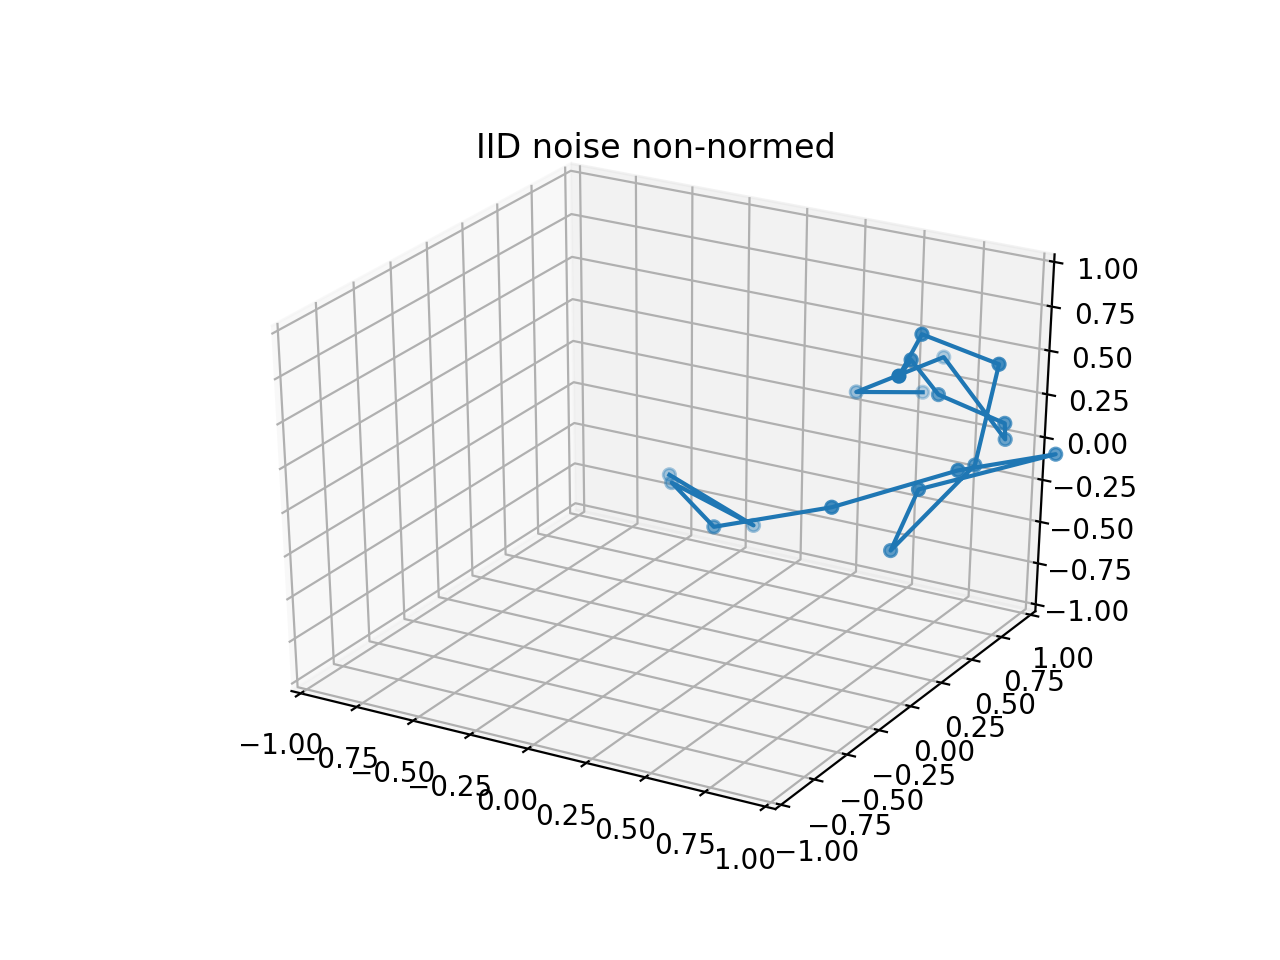

In [191]:
def iid_noise_normed_old():
    slen = 20
    cdim = 3
    ctxt = np.zeros((cdim, slen))
    noise_scale = 0.10
    for i in range(1, slen):
        noise = np.random.normal(0, noise_scale, size=cdim)
        noised = ctxt[:,i - 1] - noise
        ctxt[:,i] = noised / np.linalg.norm(noised)
    fn_name = "iid_noise_cdim" + str(cdim) + "_sdim20_delta" + str(noise_scale)
    return ctxt

ctxt = iid_noise(n_steps=20)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("IID noise non-normed")
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
ax.scatter(ctxt[:, 0], ctxt[:, 1], ctxt[:, 2])
ax.plot(ctxt[:, 0], ctxt[:, 1], ctxt[:, 2])

In [192]:
def n_sphere(n_steps=10, dim=3, var=0.1, mean=0):
    ros = np.zeros(dim - 1)
    ctxt = np.zeros((n_steps, dim))
    for i in range(n_steps):
        noise = np.random.normal(mean, var, size=(dim - 1))
        ros += noise
#         for r_ind in range(len(ros) - 1):
#             if ros[r_ind] > np.pi:
#                 ros[r_ind] = np.pi - (ros[r_ind] - np.pi)
#             if ros[r_ind] < 0:
#                 ros[r_ind] = np.pi - ros[r_ind]
#         if ros[-1] > 2 * np.pi:
#             ros[-1] = ros[-1] - 2 * np.pi
#         if ros[-1] < 0:
#             ros[-1] = 2 * np.pi - ros[-1]
#         print(ros)
        ct = np.zeros(dim)
        ct[0] = np.cos(ros[0])
        for j in range(dim - 2):
            amt = np.product([np.sin(ros[k]) for k in range(j + 1)])
            amt *= np.cos(ros[j + 1])
            ct[j + 1] = amt
        ct[dim - 1] = np.product([np.sin(ros[j]) for j in range(dim - 1)])
        ctxt[i] = ct
#     print(ctxt)
#     for row in ctxt:
#         print(np.linalg.norm(row))
    return ctxt

In [193]:
def n_sphere_var_rate_diffusion(n_steps=10, dim=3, var=0.1, mean=0, n_vars={}):
    ros = np.zeros(dim - 1)
    ctxt = np.zeros((n_steps, dim))
    var_d = {}
    for d in range(dim - 1): 
        if n_vars == {}: 
            var_d[d] = var
        else: 
            for k in n_vars: 
                if d < k: 
                    var_d[d] = n_vars[k]
    for i in range(n_steps):
        for d in range(dim - 1): 
            noise = np.random.normal(mean, var_d[d])
            ros[d] += noise
        ct = np.zeros(dim)
        ct[0] = np.cos(ros[0])
        for j in range(dim - 2):
            amt = np.product([np.sin(ros[k]) for k in range(j + 1)])
            amt *= np.cos(ros[j + 1])
            ct[j + 1] = amt
        ct[dim - 1] = np.product([np.sin(ros[j]) for j in range(dim - 1)])
        ctxt[i] = ct
    return ctxt

In [1304]:
dim = 3
var = 0.1
mean = 0.0
n_samples = 1
ctxt = n_sphere(n_steps=100, dim=dim, var=var, mean=mean, n_vars={1:0.05, 2:0.1, 3:0.2})
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Diffusion on a sphere")
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
ax.scatter(ctxt[:, 0], ctxt[:, 1], ctxt[:, 2])
ax.plot(ctxt[:, 0], ctxt[:, 1], ctxt[:, 2])

TypeError: n_sphere() got an unexpected keyword argument 'n_vars'

In [1191]:
def cos_sim(a, b): 
#     return np.dot(a, b) / (np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b, b)))
    return cosine_similarity(a.reshape(1, -1), b.reshape(1, -1))

def estimate_step_similarity_over_time(steps, d_intervals, n_samples=100, euclidean=False):
    indices = list(range(len(steps) - d_intervals[-1]))
    interval_indices = list(range(len(d_intervals)))
    avg_d = np.zeros(len(d_intervals))
    min_d = np.zeros(len(d_intervals)) - 1
    max_d = np.zeros(len(d_intervals)) - 1
    vals = np.zeros((n_samples, len(d_intervals)))
    for i in range(n_samples):
        start_ind = np.random.choice(indices)

        for j in interval_indices:
            if euclidean: 
                d = np.linalg.norm(steps[start_ind] - steps[start_ind + d_intervals[j]])
            else: 
                d = cos_sim(steps[start_ind], steps[start_ind + d_intervals[j]])
            vals[i, j] = d
    #             avg_d[j] += d
    #             if d < min_d[j] or min_d[j] == -1:
    #                 min_d[j] = d
    #             if d > max_d[j] or max_d[j] == -1:
    #                 max_d[j] = d
    # return avg_d / n_samples, min_d, max_d
    avg = np.mean(vals, axis=0)
    stddev = np.std(vals, axis=0)
    mind = np.min(vals, axis=0)
    maxd = np.max(vals, axis=0)
    return avg, stddev, mind, maxd


def single_series_time_average(steps, d_intervals, euclidean=False):
    indices = list(range(len(steps) - d_intervals[-1]))
    interval_indices = list(range(len(d_intervals)))
    vals = np.zeros(len(d_intervals))
    for j in interval_indices:
        runsum = 0
        for k in indices:
            if euclidean: 
                runsum += np.linalg.norm(steps[k] - steps[k + d_intervals[j]])
            else: 
                runsum += cos_sim(steps[k], steps[k + d_intervals[j]])
        vals[j] = runsum / len(indices)
    return vals

def multi_series_time_average(context_fun, d_intervals, n_samples, euclidean=False):
    vals = np.zeros((n_samples, len(d_intervals)))
    for i in range(n_samples):
        context = context_fun()
        ssta = single_series_time_average(context, d_intervals, euclidean)
        vals[i] = ssta
    avg = np.mean(vals, axis=0)
    stddev = np.std(vals, axis=0)
    mind = np.min(vals, axis=0)
    maxd = np.max(vals, axis=0)
    return avg, stddev, mind, maxd

def bucketed_avg_similarity(steps, d_intervals, n_samples=100, euclidean=False):
    indices = list(range(len(steps) - d_intervals[-1]))
    interval_indices = list(range(len(d_intervals)))
    avg_d = np.zeros(len(d_intervals))
    min_d = np.zeros(len(d_intervals)) - 1
    max_d = np.zeros(len(d_intervals)) - 1
    vals = np.zeros((n_samples, len(d_intervals)))
    for i in range(n_samples):
        start_ind = np.random.choice(indices)

        for j in interval_indices:
            if euclidean: 
                d = np.linalg.norm(steps[start_ind] - steps[start_ind + d_intervals[j]])
            else: 
                d = cos_sim(steps[start_ind], steps[start_ind + d_intervals[j]])
            vals[i, j] = d
    #             avg_d[j] += d
    #             if d < min_d[j] or min_d[j] == -1:
    #                 min_d[j] = d
    #             if d > max_d[j] or max_d[j] == -1:
    #                 max_d[j] = d
    # return avg_d / n_samples, min_d, max_d
    avg = np.mean(vals, axis=0)
    stddev = np.std(vals, axis=0)
    mind = np.min(vals, axis=0)
    maxd = np.max(vals, axis=0)
    return avg, stddev, mind, maxd

def autocorr(x, t=1):
    x = x.T
    print("offset " + str(t))
    print("array: " + str(x))
    if t == 0: 
        a1 = x
        a2 = x
    else: 
        a1 = x[:,:-t]
        a2 = x[:,t:]
    print("comparing")
    print(a1)
    print(a2)
    # corr = np.cov(a1, a2)
    corr = np.corrcoef(a1, a2)

    print("got result")
    print(corr)
    print("with shape " + str(corr.shape))
    return corr

def autocorr_2(x):
    print(x.shape)
    print(np.mean(x, axis=0))
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = len(x)
    variance = np.var(x, axis=0)
    mean = np.mean(x, axis=0)
    x = x - mean
    r = np.correlate(x, x, mode = 'full')[-n:]
    assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

def autocorr_3(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

def autocorr_4(x):
    print(x.shape)
    length = len(x)
    """FFT based autocorrelation function, which is faster than numpy.correlate"""
    # x is supposed to be an array of sequences, of shape (totalelements, length)
    fftx = fft(x, n=(length*2-1), axis=1)
    ret = ifft(fftx * np.conjugate(fftx), axis=1)
    ret = fftshift(ret, axes=1)
    return ret

def autocorr_5(x, t=0):
    x = x.T
    print("offset " + str(t))
    print("array: " + str(x))
    if t == 0: 
        a1 = x
        a2 = x
    else: 
        a1 = x[:,:-t]
        a2 = x[:,t:]
    print(a1)
    print(a2)
    return scipy.signal.correlate2d(a1, a2, mode="same")


def autocorr_6(x):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = len(x)
    variance = np.var(x, axis=0)
    mean = np.mean(x, axis=0)
    x = x - mean
    print(x.shape)
    r = scipy.signal.correlate2d(x, x, mode='same')
    print(r)
    # assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    var_div = np.expand_dims(variance, axis=1)*(np.expand_dims(np.arange(n, 0, -1), axis=0))
    print(var_div)
    result = r/(var_div.T)
    return result

def autocorr_7(x):
    indices = list(range(len(steps) - d_intervals[-1] - avg_over))
    interval_indices = list(range(len(d_intervals)))
    avg_d = np.zeros(len(d_intervals))
    min_d = np.zeros(len(d_intervals)) - 1
    max_d = np.zeros(len(d_intervals)) - 1
    vals = np.zeros((n_samples, len(d_intervals)))
    for j in interval_indices:
        runsum = 0
        for k in range(avg_over):
            if euclidean: 
                runsum += np.linalg.norm(steps[start_ind + k] - steps[start_ind + d_intervals[j] + k])
            else: 
                runsum += cos_sim(steps[start_ind + k], steps[start_ind + d_intervals[j] + k])
        vals[i, j] = runsum / avg_over
    print(vals.shape)
    avg = np.mean(vals, axis=0)
    stddev = np.std(vals, axis=0)
    mind = np.min(vals, axis=0)
    maxd = np.max(vals, axis=0)
    return avg, stddev, mind, maxd
    

def autocorrelation_of_intervals(steps, d_intervals, n_samples=100, euclidean=False):
    indices = list(range(len(steps) - d_intervals[-1]))
    interval_indices = list(range(len(d_intervals)))
    avg_d = np.zeros(len(d_intervals))
    min_d = np.zeros(len(d_intervals)) - 1
    max_d = np.zeros(len(d_intervals)) - 1
    vals = np.zeros((n_samples, len(d_intervals)))
    min_end = len(steps) - d_intervals[-1]
    for j in interval_indices:
        int_end = min_end + d_intervals[j]
        d_intervals[j]
        d = autocorr(steps[:int_end], d_intervals[j])
        # vals[:, j] = d
    avg = np.mean(vals, axis=0)
    stddev = np.std(vals, axis=0)
    mind = np.min(vals, axis=0)
    maxd = np.max(vals, axis=0)
    return avg, stddev, mind, maxd
    

In [1295]:
def iid_noise(n_steps=10000, stim_d=3, var=0.25, mean=0, beta=0.0, multi_steps=0):
    dim = stim_d
    ctxt = np.zeros((n_steps, dim))
    for i in range(1, n_steps):
        noise = np.random.normal(mean, var, size=dim)
        ctxt[i] = ctxt[i - 1] + noise
    return ctxt

def iid_noise_normed(n_steps=10000, dim=3, var=0.25, mean=0):
    ctxt = np.zeros((n_steps, dim))
    noise_scale = 0.25
    for i in range(1, n_steps):
        noise = np.random.normal(mean, noise_scale, size=dim)
        noised = ctxt[i - 1] - noise
        ctxt[i] = noised / np.linalg.norm(noised)
    return ctxt

def iid_noise_clamped(n_steps=10000, dim=3, var=0.01, mean=0):
    ctxt = np.zeros((n_steps, dim))
    noise_scale = 0.25
    for i in range(1, n_steps):
        noise = np.random.normal(mean, noise_scale, size=dim)
        noised = ctxt[i - 1] - noise
        noised = np.clip(noised, a_min=-1, a_max=1)
        ctxt[i] = noised
    return ctxt

def iid_noise_scaled(n_steps=10000, dim=3, var=0.01, mean=0):
    ctxt = np.zeros((n_steps, dim))
    noise_scale = 0.25
    for i in range(1, n_steps):
        noise = np.random.normal(mean, noise_scale, size=dim)
        noised = ctxt[i - 1] - noise
        noised = noised / np.max(noised)
        ctxt[i] = noised
    return ctxt

def andre_context(n_steps=10000, stim_d=3, var=0.25, mean=0, beta=0.0, multi_steps=0):
    context_drift = -np.ones([n_steps,stim_d])
    c_t = np.random.random(stim_d) 
    c_t = np.ones(stim_d)
    for step in range(n_steps):
        delta_t = np.random.normal(mean,var,stim_d)
        delta_t /= np.linalg.norm(delta_t)
        c_t += delta_t
        context_drift[step] = c_t
    return context_drift

<IPython.core.display.Javascript object>


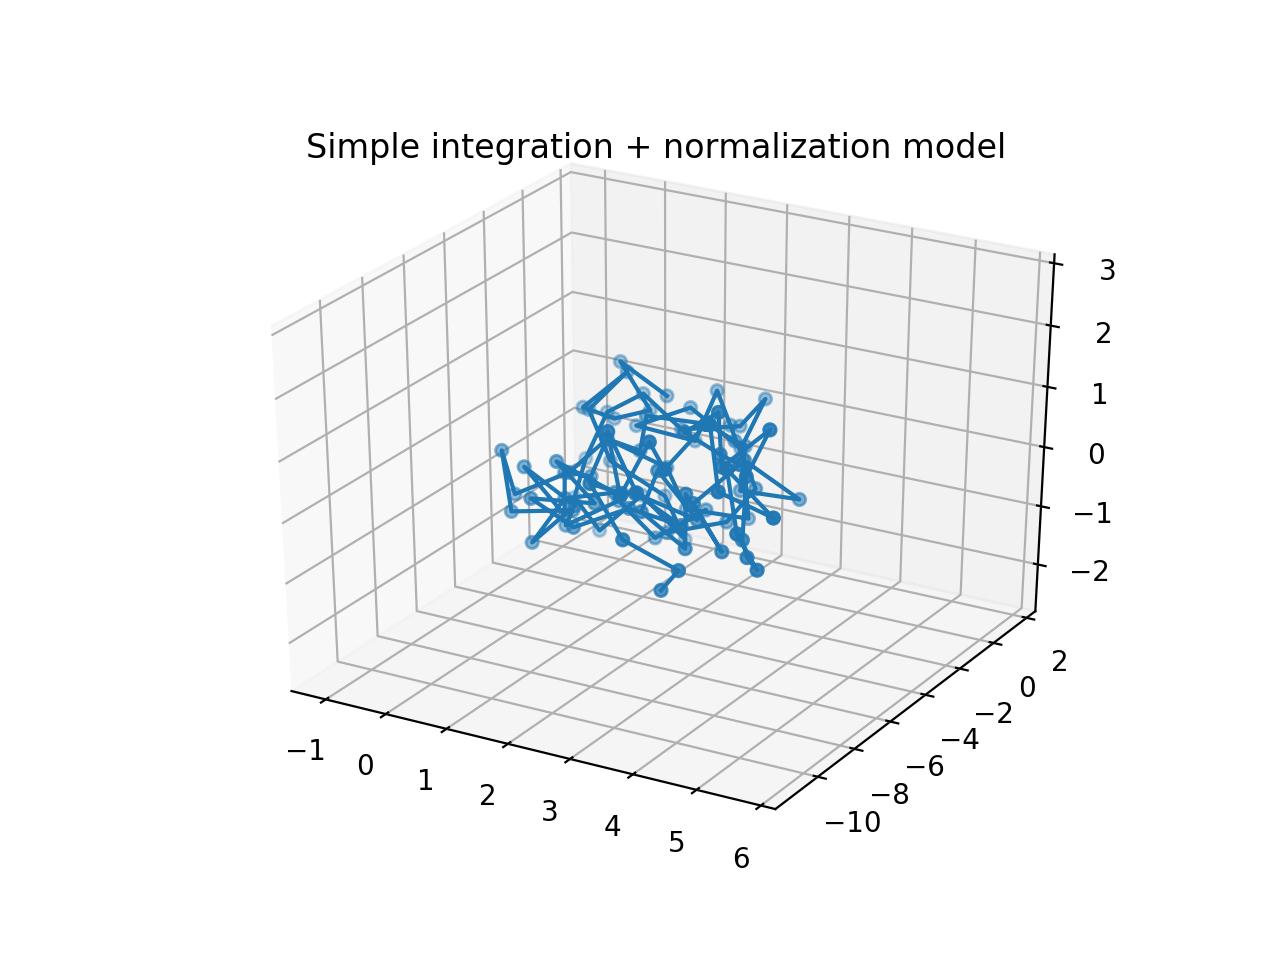

In [1296]:
dim = 3
var = 1.0
beta = 0.1
hi_var = 0.3
lo_var = 0.1
mean = 0.0
n_samples = 1
ctxt = andre_context(n_steps=100, stim_d=dim, var=var, mean=mean)
# print(ctxt)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Simple integration + normalization model")
# ax.set_xlim3d(-1, 1)
# ax.set_ylim3d(-1,1)
# ax.set_zlim3d(-1,1)
ax.scatter(ctxt[1:, 0], ctxt[1:, 1], ctxt[1:, 2])
ax.plot(ctxt[1:, 0], ctxt[1:, 1], ctxt[1:, 2])

<IPython.core.display.Javascript object>


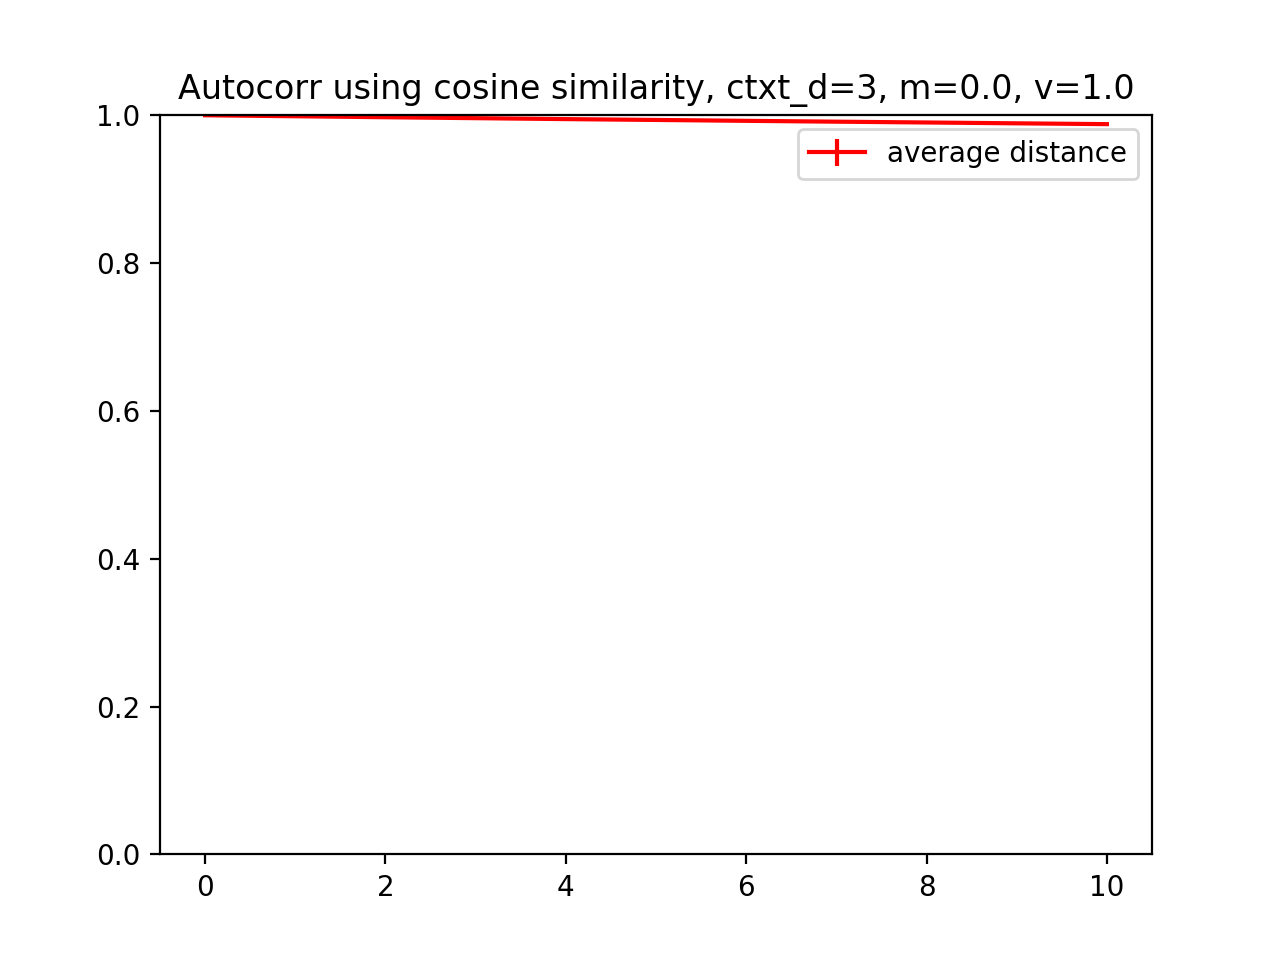

In [1303]:
##### stim_d = 100
var = 1.0
mean = 0.0
beta_lo = 0.1
beta_hi = 0.3
beta = 0.2
n_samples = 1
euclidean = False
short_int = True
multi_step = 1
stim_d = 3
v_props = [(0.01, 0.4), (0.05, 0.3), (0.1, 0.2), (0.4, 0.1)]
# ctxt = context_integration_diffusion_betabump(n_steps=10000, var=var, mean=mean, stim_d=stim_d, beta_lo=beta_lo, beta_hi=beta_hi, bump_every=100, multi_steps=multi_step)
# ctxt = context_integration_diffusion_varmult(n_steps=1000, var=var, mean=mean, stim_d=stim_d, beta=beta)
# ctxt = np.array([[0.1], [0.2], [0.3], [0.2], [0.1]])
def ctxt_gen(): 
    return iid_noise(n_steps=10000, var=var, mean=mean, stim_d=stim_d, beta=beta, multi_steps=multi_step)
#d_intervals = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]
if short_int: 
    d_intervals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
else: 
    d_intervals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 75, 100]
avg_d, std_d, min_d, max_d = multi_series_time_average(ctxt_gen, d_intervals, n_samples, euclidean=euclidean)
fig = plt.figure()
ax = fig.add_subplot(111)
label = "Autocorr using euclidean dist b/t intervals, dim=" if euclidean else "Autocorr using cosine similarity, "
# ax.set_title(label + str(stim_d) + ", var=" + str(var) + ", beta=" + str(beta))
# ax.set_title(label + str(stim_d) + ", ts=" + str(multi_step) + ", var=" + str([v[0] for v in v_props]) + ", beta=" + str(beta))
ax.set_title(label + "ctxt_d=" + str(stim_d) + ", m=" + str(mean) + ", v=" + str(var) )# + ", b=" + str(beta))
ax.errorbar(d_intervals, avg_d, yerr=std_d, color="red", label="average distance")
# ax.plot(d_intervals, min_d, color="blue", label="min distance")
# ax.plot(d_intervals, max_d, color="green", label="max distance")
ax.set_ylim(0, 1)
# ax.set_xscale("log")
if euclidean: 
    ax.legend(loc="lower right")
else: 
    ax.legend(loc="upper right")
ax.legend(loc="upper right")
fig.savefig("/Users/maia/Projects/thesis-code/Figures/DriftFns/iid_noise=" + str(euclidean) + "d=" + str(stim_d) +  "_m=" + str(mean) + "_v=" + str(var) + "_b=" + str(beta) + "_ts=" + str(multi_step) + "_nruns" + str(n_samples) + "_short=" + str(short_int) + ".png")



In [977]:
dim = 100
var = 0.05
mean = 0.00
n_samples = 1
var_d = {int(dim/2):0.01, int(dim/4 + dim/2):0.05, int(dim):0.1}
ctxt = n_sphere_var_rate_diffusion(n_steps=10000, dim=dim, var=var, mean=mean, n_vars=var_d)
#ctxt = brownian_data
d_intervals = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 75, 100, 150, 250, 500, 750, 1000, 1500, 2000]
avg_d, std_d, min_d, max_d = estimate_step_similarity_over_time(ctxt, d_intervals, n_samples=n_samples)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Cosine similarity, d=" + str(dim) + ", var=" + str(var) + ", mean=" + str(mean))
ax.errorbar(d_intervals, avg_d, yerr=std_d, color="red", label="average distance")
ax.plot(d_intervals, min_d, color="blue", label="min distance")
ax.plot(d_intervals, max_d, color="green", label="max distance")
ax.legend(loc="lower left")
fig.savefig("/Users/maia/Projects/thesis-code/Figures/DriftFns/autocorr" + str(dim) + "_" + str(var) + "_" + str(mean) + ".png")


KeyboardInterrupt: 

In [624]:
# def context_integration_diffusion_old(n_steps=10, var=0.1, mean=0, stim_d=10, drift_param=0.1, decay_rate=0.0, normed=False):
#     ftc_mat = np.identity(stim_d)
#     ctxt = np.zeros((n_steps, stim_d))
#     ctxt[0,0] = 1.0
#     for i in range(1, n_steps): 
#         stim = np.random.normal(mean, var, size=(stim_d))
#         stim = np.expand_dims(stim, axis=0)
#         # print((np.matmul(stim, ftc_mat)).shape)
#         c_in = (np.matmul(stim, ftc_mat))
#         # print(c_in.shape)
#         ctxt[i] = (1 - decay_rate) * ctxt[i - 1] + drift_param * c_in
#         if normed: 
#             ctxt[i] = ctxt[i] / np.linalg.norm(ctxt[i])
#     return ctxt


# def context_integration_diffusion(n_steps=10, var=0.1, mean=0, stim_d=10, beta=0.5, normed=False):
#     ftc_mat = np.identity(stim_d)
#     ctxt = np.zeros((n_steps, stim_d))
#     ctxt[0,0] = 1.0
#     for i in range(1, n_steps): 
#         stim = np.random.normal(mean, var, size=(stim_d))
#         stim = np.expand_dims(stim, axis=0)
#         c_in = (np.matmul(stim, ftc_mat))
#         c_dot = np.dot(ctxt[i - 1], c_in[0])

#         p = np.sqrt(1 + beta**2 * (c_dot ** 2 - 1)) - beta * c_dot
#         # print((np.matmul(stim, ftc_mat)).shape)
#         # print(c_in.shape)
#         ctxt[i] = p * ctxt[i - 1] + beta * c_in
#         if normed: 
#             ctxt[i] = ctxt[i] / np.linalg.norm(ctxt[i])
#     return ctxt


# def context_integration_diffusion_like_paper(n_steps=10, var=0.1, mean=0, stim_d=10, beta=0.5, normed=False):
#     stims = np.identity(stim_d)
#     ftc_met = np.random.normal(mean, var, size=(stim_d))
#     ctxt = np.zeros((n_steps, stim_d))
#     ctxt[0,0] = 1.0
#     for i in range(1, n_steps): 
#         stim = np.random.choice(stims)
#         stim = np.expand_dims(stim, axis=0)
#         c_in = (np.matmul(stim, ftc_mat))
#         c_in = c_in / np.linalg.norm(c_in)

#         c_dot = np.dot(ctxt[i - 1], c_in[0])

#         p = np.sqrt(1 + beta**2 * (c_dot ** 2 - 1)) - beta * c_dot
#         # print((np.matmul(stim, ftc_mat)).shape)
#         # print(c_in.shape)
#         ctxt[i] = p * ctxt[i - 1] + beta * c_in
#     return ctxt



# def context_integration_diffusion_varmult(n_steps=10, var=0.1, mean=0, stim_d=10, beta=0.5, normed=False):
#     ftc_mat = np.identity(stim_d)
#     ctxt = np.zeros((n_steps, stim_d))
#     ctxt[0,0] = 1.0
#     for i in range(1, n_steps): 
#         stim = np.random.normal(mean, var, size=(stim_d))
#         stim = np.expand_dims(stim, axis=0)
#         c_in = (np.matmul(stim, ftc_mat))
#         c_dot = np.dot(ctxt[i - 1], c_in[0])
#         p = np.sqrt(1 + beta**2 * (c_dot ** 2 - 1)) - beta * c_dot
#         # print((np.matmul(stim, ftc_mat)).shape)
#         # print(c_in.shape)
#         ctxt[i] = p * ctxt[i - 1] + beta * c_in
#         ctxt[i] = ctxt[i] / np.linalg.norm(ctxt[i])
#     return ctxt

# def context_integration_diffusion_varmult(n_steps=10, var=0.1, mean=0, stim_d=10, beta=0.5, normed=False):
#     ftc_mat = np.identity(stim_d)
#     ctxt = np.zeros((n_steps, stim_d))
#     ctxt[0,0] = 1.0
#     for i in range(1, n_steps): 
#         stim = np.random.normal(mean, var, size=(stim_d))
#         stim = np.expand_dims(stim, axis=0)
#         c_in = (np.matmul(stim, ftc_mat))
#         c_dot = np.dot(ctxt[i - 1], c_in[0])
#         p = np.sqrt(1 + beta**2 * (c_dot ** 2 - 1)) - beta * c_dot
#         # print((np.matmul(stim, ftc_mat)).shape)
#         # print(c_in.shape)
#         ctxt[i] = p * ctxt[i - 1] + beta * c_in
#         ctxt[i] = ctxt[i] / np.linalg.norm(ctxt[i])
#     return ctxt


# def context_integration_diffusion_varmult(n_steps=10, var=0.1, mean=0, stim_d=10, beta=0.5, normed=False):
#     ftc_mat = np.identity(stim_d)
#     ctxt = np.zeros((n_steps, stim_d))
#     ctxt[0,0] = 1.0
#     for i in range(1, n_steps): 
#         stim = np.random.normal(mean, var, size=(stim_d))
#         stim = np.expand_dims(stim, axis=0)
#         c_in = (np.matmul(stim, ftc_mat))
#         c_dot = np.dot(ctxt[i - 1], c_in[0])
#         p = np.sqrt(1 + beta**2 * (c_dot ** 2 - 1)) - beta * c_dot
#         # print((np.matmul(stim, ftc_mat)).shape)
#         # print(c_in.shape)
#         ctxt[i] = p * ctxt[i - 1] + beta * c_in
#         ctxt[i] = ctxt[i] / np.linalg.norm(ctxt[i])
#     return ctxt

# def context_integration_diffusion_betabump(n_steps=10, var=0.3, mean=0, stim_d=10, beta=0.3, beta_seg=0.8, bump_every=10, normed=False):
#     ftc_mat = np.identity(stim_d)
#     ctxt = np.zeros((n_steps, stim_d))
#     ctxt[0,0] = 1.0
#     beta_c = beta
#     for i in range(1, n_steps): 
#         if i % bump_every == 0: 
#             beta_c = beta_seg
#         else:
#             beta_c = beta
#         stim = np.random.normal(mean, var, size=(stim_d))
#         stim = np.expand_dims(stim, axis=0)
#         c_in = (np.matmul(stim, ftc_mat))
#         c_dot = np.dot(ctxt[i - 1], c_in[0])
#         p = np.sqrt(1 + beta_c**2 * (c_dot ** 2 - 1)) - beta_c * c_dot
#         # print((np.matmul(stim, ftc_mat)).shape)
#         # print(c_in.shape)
#         ctxt[i] = p * ctxt[i - 1] + beta_c * c_in
#         ctxt[i] = ctxt[i] / np.linalg.norm(ctxt[i])
#     return ctxt

# def context_integration_diffusion_varbump(n_steps=10, var=0.3, mean=0, stim_d=10, beta=0.3, var_seg=0.8, bump_every=10, normed=False):
#     ftc_mat = np.identity(stim_d)
#     ctxt = np.zeros((n_steps, stim_d))
#     ctxt[0,0] = 1.0
#     var

In [1239]:
def context_integration_diffusion_old(n_steps=10, var=0.1, mean=0, stim_d=10, drift_param=0.1, decay_rate=0.0, normed=False):
    ftc_mat = np.identity(stim_d)
    ctxt = np.zeros((n_steps, stim_d))
    ctxt[0,0] = 1.0
    for i in range(1, n_steps): 
        stim = np.random.normal(mean, var, size=(stim_d))
        stim = np.expand_dims(stim, axis=0)
        # print((np.matmul(stim, ftc_mat)).shape)
        c_in = (np.matmul(stim, ftc_mat))
        # print(c_in.shape)
        ctxt[i] = (1 - decay_rate) * ctxt[i - 1] + drift_param * c_in
        if normed: 
            ctxt[i] = ctxt[i] / np.linalg.norm(ctxt[i])
    return ctxt


def context_integration_diffusion(n_steps=10, var=0.1, mean=0, stim_d=10, beta=0.5, normed=False):
    ftc_mat = np.identity(stim_d)
    ctxt = np.zeros((n_steps, stim_d))
    ctxt[0,0] = 1.0
    for i in range(1, n_steps): 
        stim = np.random.normal(mean, var, size=(stim_d))
        stim = np.expand_dims(stim, axis=0)
        c_in = (np.matmul(stim, ftc_mat))
        c_dot = np.dot(ctxt[i - 1], c_in[0])

        p = np.sqrt(1 + beta**2 * (c_dot ** 2 - 1)) - beta * c_dot
        # print((np.matmul(stim, ftc_mat)).shape)
        # print(c_in.shape)
        ctxt[i] = p * ctxt[i - 1] + beta * c_in
        if normed: 
            ctxt[i] = ctxt[i] / np.linalg.norm(ctxt[i])
    return ctxt


def context_integration_diffusion_like_paper(n_steps=10, var=0.3, mean=0, stim_d=10, beta=0.3, normed=False):
    stims = np.identity(stim_d)
    stim_inds = list(range(stim_d))
    ftc_mat = np.random.normal(mean, var, size=(stim_d))
    ctxt = np.zeros((n_steps, stim_d))
    ctxt[0,0] = 1.0
    for i in range(1, n_steps): 
        stim = stims[np.random.choice(stim_inds)]
        stim = np.expand_dims(stim, axis=0)
        c_in = (np.matmul(stim, ftc_mat))
        c_in = c_in / np.linalg.norm(c_in)

        c_dot = np.dot(ctxt[i - 1], c_in[0])

        p = np.sqrt(1 + beta**2 * (c_dot ** 2 - 1)) - beta * c_dot
        # print((np.matmul(stim, ftc_mat)).shape)
        # print(c_in.shape)
        ctxt[i] = p * ctxt[i - 1] + beta * c_in
    return ctxt



def context_integration_diffusion_varmult(n_steps=10, var=0.1, mean=0, stim_d=10, beta=0.5, normed=False):
    ftc_mat = np.identity(stim_d)
    ctxt = np.zeros((n_steps, stim_d))
    ctxt[0,0] = 1.0
    for i in range(1, n_steps): 
        stim = np.random.normal(mean, var, size=(stim_d))
        stim = np.expand_dims(stim, axis=0)
        c_in = (np.matmul(stim, ftc_mat))
        c_dot = np.dot(ctxt[i - 1], c_in[0])
        p = np.sqrt(1 + beta**2 * (c_dot ** 2 - 1)) - beta * c_dot
        # print((np.matmul(stim, ftc_mat)).shape)
        # print(c_in.shape)
        ctxt[i] = p * ctxt[i - 1] + beta * c_in
        ctxt[i] = ctxt[i] / np.linalg.norm(ctxt[i])
    return ctxt

def context_integration_diffusion_varmult(n_steps=10, var=0.1, mean=0, stim_d=10, beta=0.5, normed=False):
    ftc_mat = np.identity(stim_d)
    ctxt = np.zeros((n_steps, stim_d))
    ctxt[0,0] = 1.0
    for i in range(1, n_steps): 
        stim = np.random.normal(mean, var, size=(stim_d))
        stim = np.expand_dims(stim, axis=0)
        c_in = (np.matmul(stim, ftc_mat))
        c_dot = np.dot(ctxt[i - 1], c_in[0])
        p = np.sqrt(1 + beta**2 * (c_dot ** 2 - 1)) - beta * c_dot
        # print((np.matmul(stim, ftc_mat)).shape)
        # print(c_in.shape)
        ctxt[i] = p * ctxt[i - 1] + beta * c_in
        ctxt[i] = ctxt[i] / np.linalg.norm(ctxt[i])
    return ctxt


def context_integration_diffusion_varmult(n_steps=10, var=0.1, mean=0, stim_d=10, beta=0.5, normed=False):
    ftc_mat = np.identity(stim_d)
    ctxt = np.zeros((n_steps, stim_d))
    ctxt[0,0] = 1.0
    for i in range(1, n_steps): 
        stim = np.random.normal(mean, var, size=(stim_d))
        stim = np.expand_dims(stim, axis=0)
        c_in = (np.matmul(stim, ftc_mat))
        c_dot = np.dot(ctxt[i - 1], c_in[0])
        p = np.sqrt(1 + beta**2 * (c_dot ** 2 - 1)) - beta * c_dot
        # print((np.matmul(stim, ftc_mat)).shape)
        # print(c_in.shape)
        ctxt[i] = p * ctxt[i - 1] + beta * c_in
        ctxt[i] = ctxt[i] / np.linalg.norm(ctxt[i])
    return ctxt

def context_integration_diffusion_betabump(n_steps=10, var=0.3, mean=0, stim_d=10, beta_lo=0.3, beta_hi=0.8, bump_every=10, normed=False, multi_steps=1):
    ftc_mat = np.identity(stim_d)
    ctxt = np.zeros((n_steps, stim_d))
    ctxt[0,0] = 1.0
    beta_c = beta_lo
    beta_hiest = 0.6
    for i in range(1, n_steps): 
        if i % bump_every == 0 and i > 0: 
            beta_c = beta_hi
        else:
            beta_c = beta_lo
        prev_c = ctxt[i - 1]
        for j in range(multi_steps):
            stim = np.random.normal(mean, var, size=(stim_d))
            stim = np.expand_dims(stim, axis=0)
            c_in = (np.matmul(stim, ftc_mat))
            c_dot = np.dot(prev_c, c_in[0])
            p = np.sqrt(1 + beta_c**2 * (c_dot ** 2 - 1)) - beta_c * c_dot
            # print((np.matmul(stim, ftc_mat)).shape)
            # print(c_in.shape)
            prev_c = p * prev_c + beta_c * c_in
            prev_c = prev_c / np.linalg.norm(prev_c)
        ctxt[i] = prev_c 
    return ctxt

def context_integration_diffusion_varbump(n_steps=10, var_lo=0.1, var_hi=0.4, mean=0, stim_d=10, beta=0.3, var_seg=0.8, bump_every=10, normed=False):
    ftc_mat = np.identity(stim_d)
    ctxt = np.zeros((n_steps, stim_d))
    ctxt[0,0] = 1.0
    var_c = var
    for i in range(1, n_steps): 
        if i % bump_every == 0: 
            var_c = var_seg
        else:
            var_c = var
        stim = np.random.normal(mean, var_c, size=(stim_d))
        stim = np.expand_dims(stim, axis=0)
        c_in = (np.matmul(stim, ftc_mat))
        c_dot = np.dot(ctxt[i - 1], c_in[0])
        p = np.sqrt(1 + beta**2 * (c_dot ** 2 - 1)) - beta * c_dot
        # print((np.matmul(stim, ftc_mat)).shape)
        # print(c_in.shape)
        ctxt[i] = p * ctxt[i - 1] + beta * c_in
        ctxt[i] = ctxt[i] / np.linalg.norm(ctxt[i])
    return ctxt

def cint_diff_partial_var(n_steps=10, var_hi=0.3, var_lo=0.1, mean=0, stim_d=10, beta=0.3, all_every=10, normed=False):
    ftc_mat = np.identity(stim_d)
    ctxt = np.zeros((n_steps, stim_d))
    ctxt[0,0] = 1.0
    stim_inds = list(range(stim_d))
    d_every = int(stim_d*var_prop)
    v_inds = np.random.choice(stim_inds, size=d_every)
    for i in range(1, n_steps): 
        if i % all_every == 0: 
            v_inds = stim_inds
        if i % all_every == 1:
            v_inds = np.random.choice(stim_inds, size=d_every)
        hi_var = np.random.normal(mean, var_hi, size=(len(v_inds)))
        stim = np.random.normal(mean, var_lo, size=stim_d)
        for i in range(len(v_inds)):
            stim[v_inds[i]] = hi_var[i]
        print(stim)
        stim = np.expand_dims(stim, axis=0)
        c_in = (np.matmul(stim, ftc_mat))
        print(c_in)
        c_dot = np.dot(ctxt[i - 1], c_in[0])
        print("cdot")
        print(c_dot)
        p = np.sqrt(1 + beta**2 * (c_dot ** 2 - 1)) - beta * c_dot
        print(p)
        print("===================")
        # print((np.matmul(stim, ftc_mat)).shape)
        # print(c_in.shape)
        ctxt[i] = p * ctxt[i - 1] + beta * c_in
        ctxt[i] = ctxt[i] / np.linalg.norm(ctxt[i])
    return ctxt

def cint_diff_varying_var_multistep(n_steps=10, var_props=[(0.3, 1.0)], mean=0, stim_d=10, beta=0.3, multi_steps=10):
    if np.abs(np.sum([pair[1] for pair in var_props]) - 1.0) > 0.001: 
        raise ValueError("Proportions must sum to 1 but got " + str(np.sum([pair[1] for pair in var_props])))
    ftc_mat = np.identity(stim_d)
    ctxt = np.zeros((n_steps, stim_d))
    ctxt[0,0] = 1.0
    var_inds = {}
    prev_idx = 0
    for (var, prop) in var_props:
        new_idx = prev_idx + int(prop * stim_d)
        if new_idx == stim_d - 1: 
            new_idx = stim_d
        var_inds[var] = list(range(prev_idx, new_idx))
        prev_idx = new_idx
    for i in range(1, n_steps): 
        prev_c = ctxt[i - 1]
        for j in range(multi_steps):
            stim = np.zeros(stim_d)
            for var, inds in var_inds.items(): 
                noise = np.random.normal(mean, float(var), size=(len(inds)))
                stim[inds[0]:inds[-1] + 1] = noise
            stim = np.expand_dims(stim, axis=0)
            c_in = (np.matmul(stim, ftc_mat))
            c_dot = np.dot(prev_c, c_in[0])
            p = np.sqrt(1 + beta**2 * (c_dot ** 2 - 1)) - beta * c_dot
            prev_c = p * prev_c + beta * c_in
            prev_c = prev_c / np.linalg.norm(prev_c)
        ctxt[i] = prev_c
    return ctxt

def context_integration_diffusion_multistep(n_steps=10, var=0.3, mean=0, stim_d=10, beta=0.3, multi_steps=10, normed=False):
    ftc_mat = np.identity(stim_d)
    ctxt = np.zeros((n_steps, stim_d))
    ctxt[0,0] = 1.0
    for i in range(1, n_steps):
        prev_c = ctxt[i - 1]
        for j in range(multi_steps):
            stim = np.random.normal(mean, var, size=(stim_d))
            stim = np.expand_dims(stim, axis=0)
            c_in = (np.matmul(stim, ftc_mat))
            c_dot = np.dot(ctxt[i - 1], c_in[0])
            p = np.sqrt(1 + beta**2 * (c_dot ** 2 - 1)) - beta * c_dot
            # print((np.matmul(stim, ftc_mat)).shape)
            # print(c_in.shape)
            prev_c = p * prev_c + beta * c_in
            prev_c = prev_c / np.linalg.norm(prev_c)
        ctxt[i] = prev_c
    return ctxt

def context_integration_diffusion_murdock(n_steps=10, var=0.1, mean=0.0, stim_d=10, beta=0.5, multi_steps=1):
    ctxt = np.zeros((n_steps, stim_d))
    ctxt[0,0] = 1.0
    p = 1 - beta
    var = 1.0 / stim_d
    print(var)
    for i in range(1, n_steps): 
        prev_c = ctxt[i - 1]
        for j in range(multi_steps):
            stim = np.random.normal(mean, var, size=(stim_d))
            # stim = stim / np.linalg.norm(stim)
            stim = np.expand_dims(stim, axis=0)
            # print((np.matmul(stim, ftc_mat)).shape)
            # print(c_in.shape)
            prev_c = p * prev_c + np.sqrt(1 - p**2) * stim
        ctxt[i] = prev_c
    return ctxt


def adam_context_integration_diffusion_multistep(n_steps=10, var=0.3, mean=0, stim_d=10, beta=0.3, multi_steps=10, normed=False):
    ftc_mat = np.identity(stim_d)
    ctxt = np.zeros((n_steps, stim_d))
    ctxt[0,0] = 1.0
    for i in range(1, n_steps):
        prev_c = ctxt[i - 1]
        for j in range(multi_steps):
            stim = np.random.normal(mean, var, size=(stim_d))
            stim = np.expand_dims(stim, axis=0)
            c_in = (np.matmul(stim, ftc_mat))
            c_dot = np.dot(ctxt[i - 1], c_in[0])
            p = np.sqrt(1 + beta**2 * (c_dot ** 2 - 1)) - beta * c_dot
            # print((np.matmul(stim, ftc_mat)).shape)
            # print(c_in.shape)
            prev_c = p * prev_c + c_in
            print(np.linalg.norm(prev_c))
            # prev_c = prev_c / np.linalg.norm(prev_c)
        ctxt[i] = prev_c
    return ctxt

def simple_context_integration_diffusion_multistep(n_steps=10, var=0.3, mean=0, stim_d=10, beta=0.3, multi_steps=10, normed=False):
    ftc_mat = np.identity(stim_d)
    ctxt = np.zeros((n_steps, stim_d))
    ctxt[0,0] = 1.0
    for i in range(1, n_steps):
        prev_c = ctxt[i - 1]
        for j in range(multi_steps):
            stim = np.random.normal(mean, var, size=(stim_d))
            stim = np.expand_dims(stim, axis=0)
            prev_c = prev_c + beta * stim
            # print(np.linalg.norm(prev_c))
            prev_c = prev_c / np.linalg.norm(prev_c)
        ctxt[i] = prev_c
    return ctxt


def simple_scaled_context_integration_diffusion_multistep(n_steps=10, var=0.3, mean=0, stim_d=10, beta=0.3, multi_steps=10, normed=False):
    ftc_mat = np.identity(stim_d)
    ctxt = np.zeros((n_steps, stim_d))
    ctxt[0,0] = 1.0
    for i in range(1, n_steps):
        prev_c = ctxt[i - 1]
        for j in range(multi_steps):
            stim = np.random.normal(mean, var, size=(stim_d))
            stim = np.expand_dims(stim, axis=0)
            prev_c = (1 - beta) * prev_c + beta * stim
            # print(np.linalg.norm(prev_c))
            prev_c = prev_c / np.linalg.norm(prev_c)
        ctxt[i] = prev_c
    return ctxt


def dim_reduced_diffusion(n_steps=1000, var=0.3, mean=0, h_dim=500, l_dim=10, beta=0.3, multi_steps=10, normed=False):
    activation = np.zeros((n_steps, h_dim))
    activation[0,0] = 1.0
    for i in range(1, n_steps):
        noise = np.random.normal(0.0, var, size=h_dim)
        activation[i] = activation[i - 1] - noise
    pca = PCA(n_components=l_dim)
    components = pca.fit_transform(activation)
    return components
    

Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x1899ab840>
Traceback (most recent call last):
  File "/Users/maia/miniconda3/lib/python3.7/weakref.py", line 51, in _cb
    def _cb(arg):
KeyboardInterrupt


In [1040]:
b = simple_context_integration_diffusion_multistep(n_steps=100, stim_d=100, var=0.1, mean=mean, beta=0.1)

In [1142]:
n = 10
print(np.linalg.norm(np.random.normal(0.0, np.sqrt(1/n), size=(n))))

1.1555638374540391


<IPython.core.display.Javascript object>


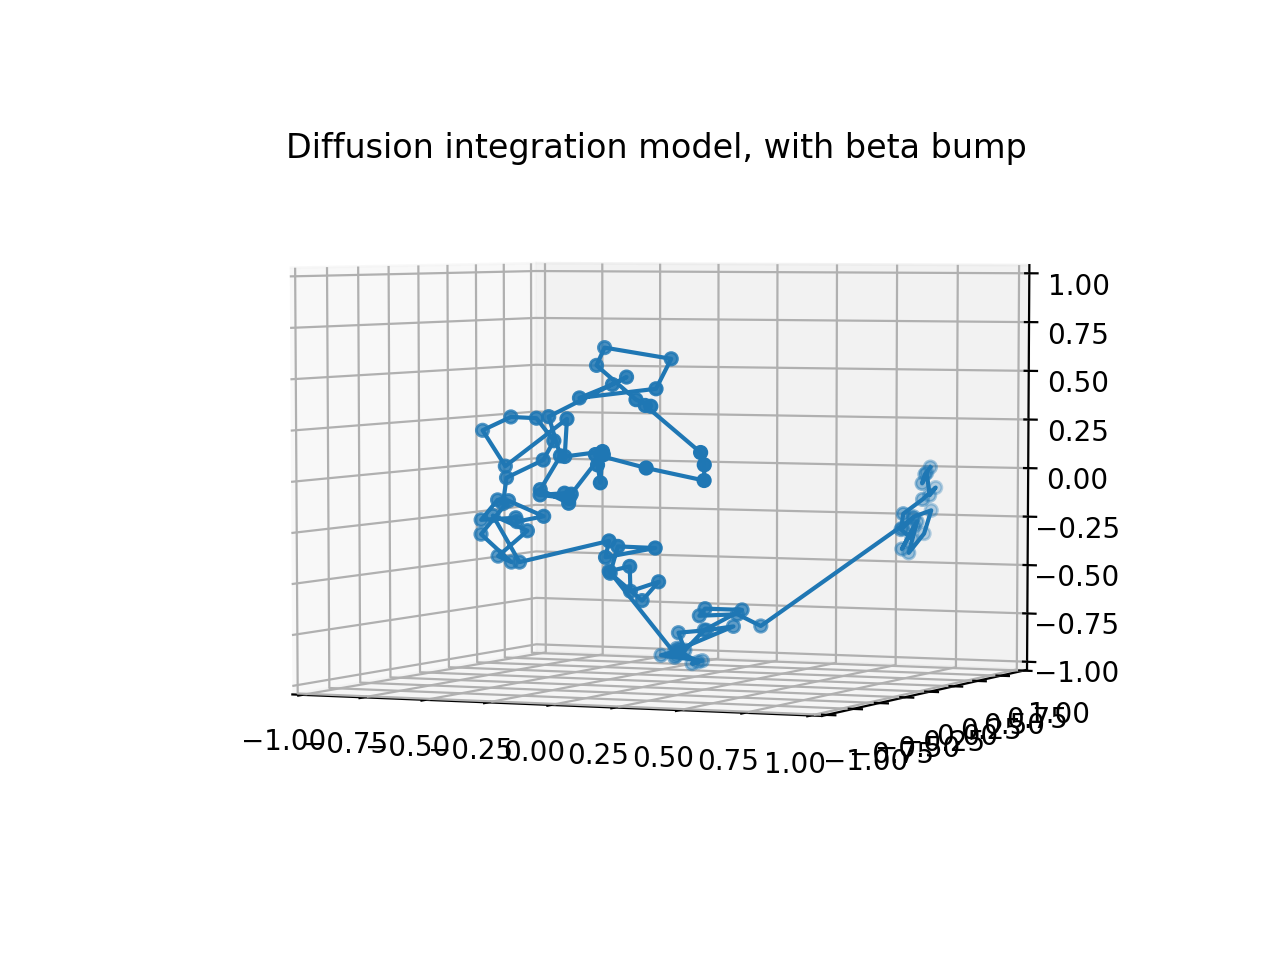

In [886]:
dim = 3
hi_var = 0.3
lo_var = 0.1
mean = 0.0
n_samples = 1
ctxt = context_integration_diffusion_betabump(n_steps=100, stim_d=dim, var=0.3, mean=mean, beta_lo=0.3, beta_hi=0.8, bump_every=10,)
# print(ctxt)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Diffusion integration model, with beta bump")
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
ax.scatter(ctxt[1:, 0], ctxt[1:, 1], ctxt[1:, 2])
ax.plot(ctxt[1:, 0], ctxt[1:, 1], ctxt[1:, 2])

<IPython.core.display.Javascript object>


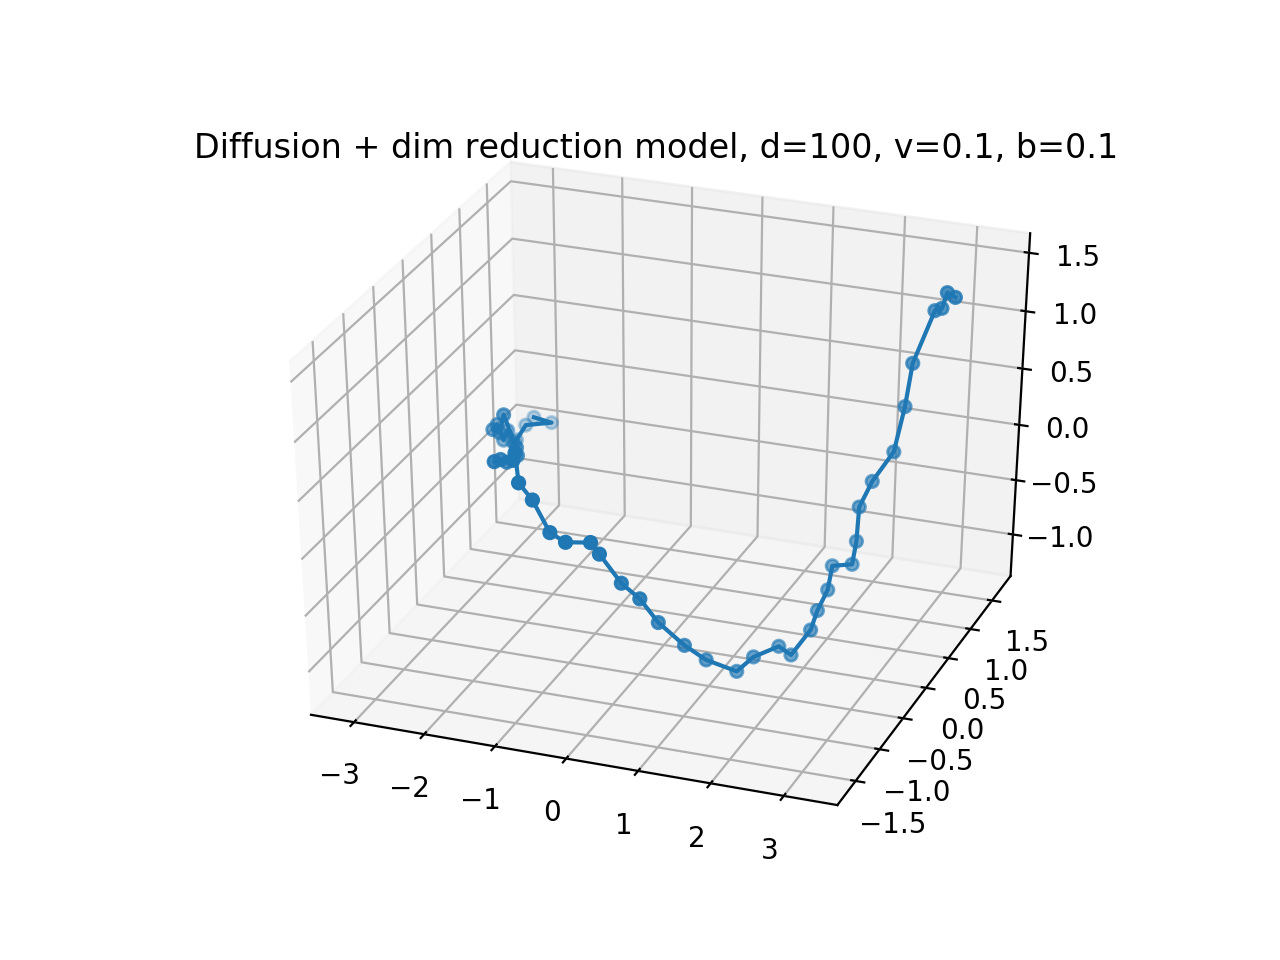

In [1252]:
dim = 100
var = 0.1
beta = 0.1
hi_var = 0.3
lo_var = 0.1
mean = 0.0
n_samples = 1
ctxt = dim_reduced_diffusion(n_steps=50, l_dim=3, h_dim=100, var=var, mean=mean, beta=beta)
# print(ctxt)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Diffusion + dim reduction model, d=" + str(dim) + ", v=" + str(var) + ", b=" + str(beta))
# ax.set_xlim3d(-1, 1)
# ax.set_ylim3d(-1,1)
# ax.set_zlim3d(-1,1)
ax.scatter(ctxt[1:, 0], ctxt[1:, 1], ctxt[1:, 2])
ax.plot(ctxt[1:, 0], ctxt[1:, 1], ctxt[1:, 2])

<IPython.core.display.Javascript object>


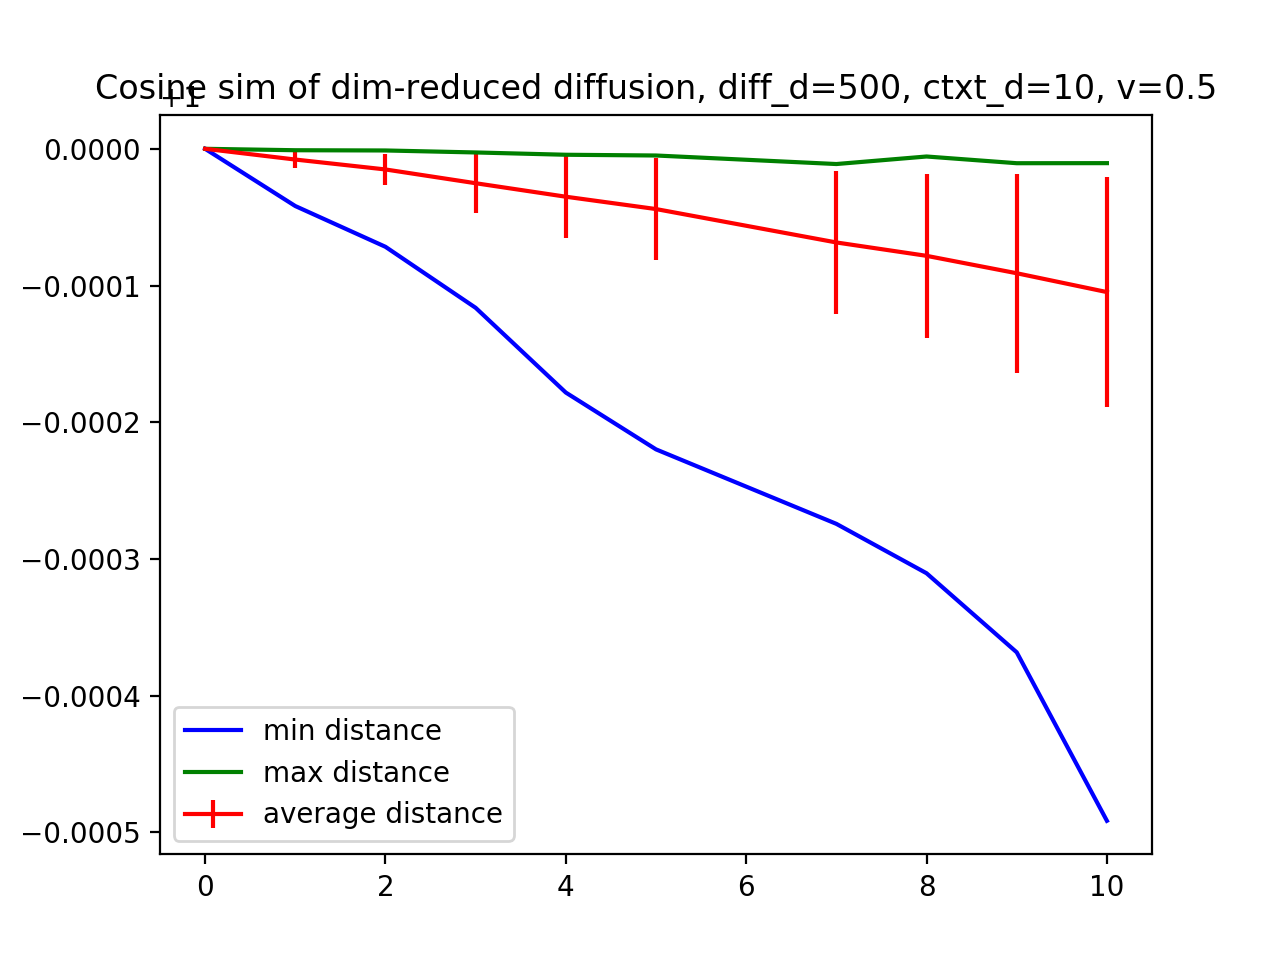

In [1251]:
##### stim_d = 100
var = 0.5
mean = 0.00
beta_lo = 0.1
beta_hi = 0.3
beta = 0.5
n_samples = 100
euclidean = False
short_int = True
multi_step = 1
stim_d=100

l_dim = 10
h_dim = 500
v_props = [(0.01, 0.4), (0.05, 0.3), (0.1, 0.2), (0.4, 0.1)]
# ctxt = context_integration_diffusion_betabump(n_steps=10000, var=var, mean=mean, stim_d=stim_d, beta_lo=beta_lo, beta_hi=beta_hi, bump_every=100, multi_steps=multi_step)
ctxt = dim_reduced_diffusion(n_steps=10000, var=var, mean=mean, l_dim=10, h_dim=500, beta=1000, multi_steps=multi_step)
# ctxt = context_integration_diffusion_murdock(n_steps=10000, var=var, mean=mean, stim_d=stim_d, beta=beta, multi_steps=multi_step)
#d_intervals = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]
if short_int: 
    d_intervals = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10]
else: 
    d_intervals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 75, 100, 150, 250, 300, 400, 500]
avg_d, std_d, min_d, max_d = estimate_step_similarity_over_time(ctxt, d_intervals, n_samples=n_samples, euclidean=euclidean)
fig = plt.figure()
ax = fig.add_subplot(111)
label = "Simple, euclidean dist b/t intervals, dim=" if euclidean else "Cosine sim of dim-reduced diffusion, "
# ax.set_title(label + str(stim_d) + ", var=" + str(var) + ", b_lo=" + str(beta_lo) + ", b_hi=" + str(beta_hi))
# ax.set_title(label + str(stim_d) + ", ts=" + str(multi_step) + ", var=" + str(var) + ", beta=" + str(beta))
ax.set_title(label + "diff_d=" + str(h_dim) + ", ctxt_d=" + str(l_dim) + ", v=" + str(var))
ax.errorbar(d_intervals, avg_d, yerr=std_d, color="red", label="average distance")
ax.plot(d_intervals, min_d, color="blue", label="min distance")
ax.plot(d_intervals, max_d, color="green", label="max distance")
# ax.set_ylim(0, 2)
# ax.set_xscale("log")
if euclidean: 
    ax.legend(loc="lower right")
else: 
    ax.legend(loc="lower left")
fig.savefig("/Users/maia/Projects/thesis-code/Figures/DriftFns/dimensionality_reduction=" + str(euclidean) + "d=" + str(stim_d) + "_v=" + str(var) + "_b=" + str(beta) + "_ts=" + str(multi_step) + "_nruns" + str(n_samples) + "_short=" + str(short_int) + ".png")





<IPython.core.display.Javascript object>


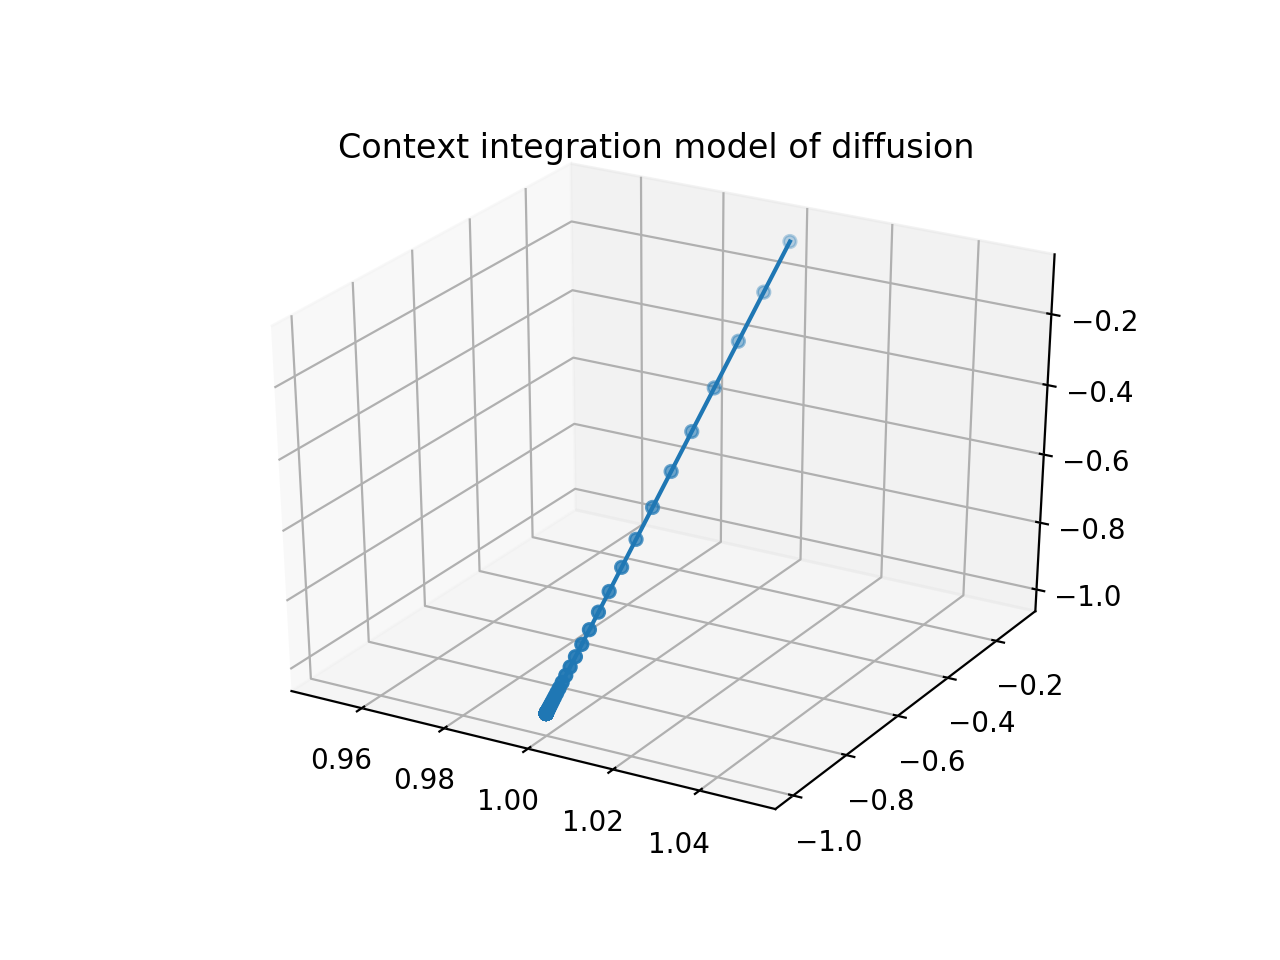

In [743]:
def three_walks(n_steps=10, var=0.1, mean=0, stim_d=10, beta=0.1, normed=False):
    ftc_mat = np.identity(stim_d)
    ctxt = np.zeros((n_steps, stim_d))
    ctxt[0,0] = 1.0
    for i in range(1, n_steps): 
        stim = np.random.normal(mean, var, size=(stim_d))
        stim = np.expand_dims(stim, axis=0)
        c_in = (np.matmul(stim, ftc_mat))
        c_in = c_in / np.linalg.norm(c_in)

        c_dot = np.dot(ctxt[i - 1], c_in[0])

        p = np.sqrt(1 + beta**2 * (c_dot ** 2 - 1)) - beta * c_dot
        # print((np.matmul(stim, ftc_mat)).shape)
        # print(c_in.shape)
        ctxt[i] = p * ctxt[i - 1] + beta * c_in
    return ctxt


dim = 3
var = 0.1
mean = 0.0
n_samples = 1
ctxt = context_integration_diffusion_like_paper(n_steps=100, stim_d=dim, var=var, mean=mean, beta=0.1, normed=False)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Context integration model of diffusion")
# ax.set_xlim3d(-1, 1)
# ax.set_ylim3d(-1,1)
# ax.set_zlim3d(-1,1)
ax.scatter(ctxt[1:, 0], ctxt[1:, 1], ctxt[1:, 2])
ax.plot(ctxt[1:, 0], ctxt[1:, 1], ctxt[1:, 2])

<IPython.core.display.Javascript object>


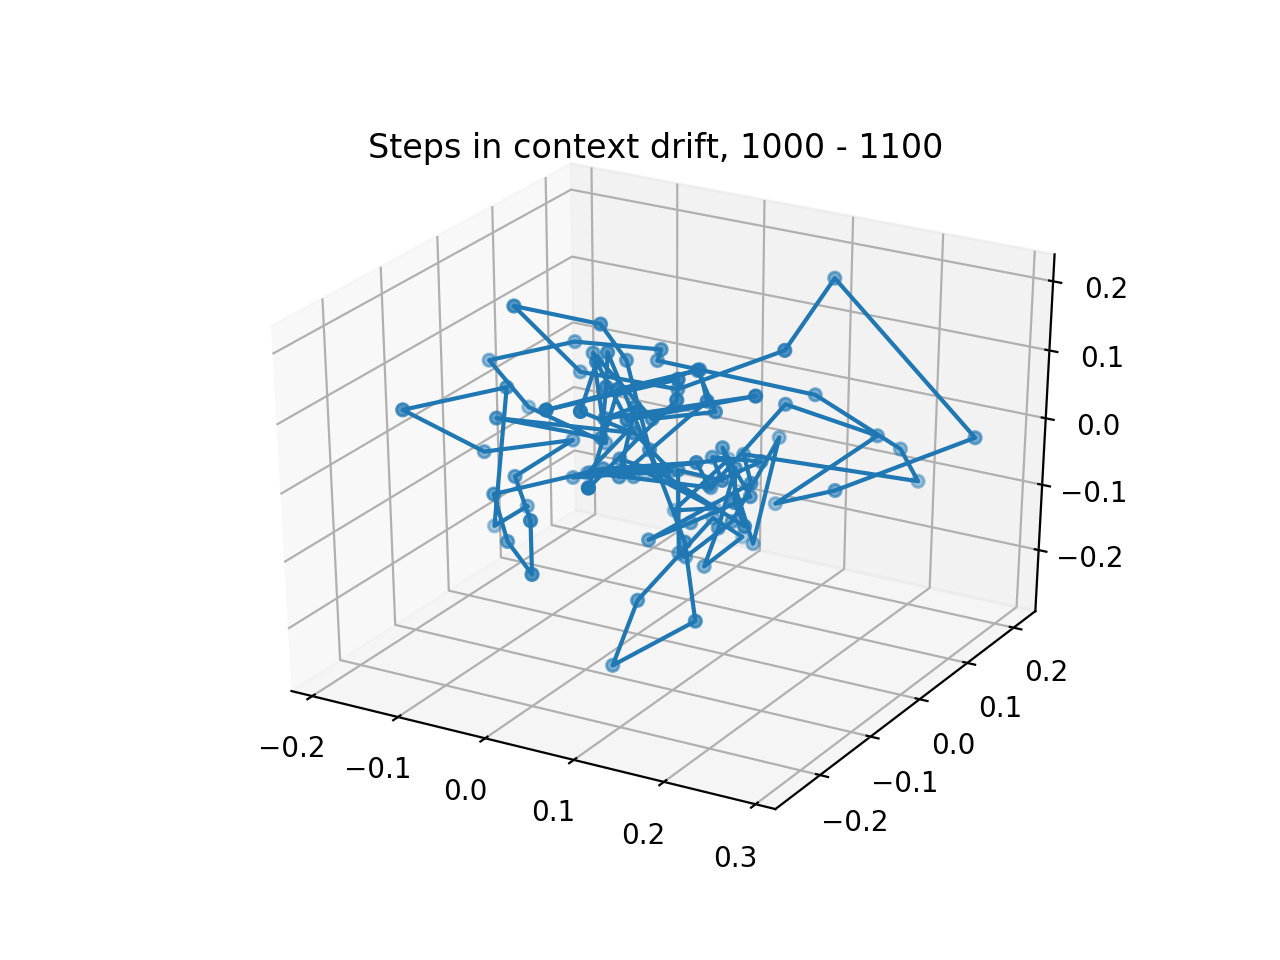

In [595]:
ctxt = np.load("/Users/maia/Projects/thesis-code/drift_fn_models/gf_integration_normed_noutput=100_v=0.3_beta=0.3_context_vector.npy")
st = 1000
end = st + 100
ctxt = ctxt[st:end]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Steps in context drift, " + str(st) + " - " + str(end))
# ax.set_xlim3d(-1, 1)
# ax.set_ylim3d(-1,1)
# ax.set_zlim3d(-1,1)
ax.scatter(ctxt[1:, 0], ctxt[1:, 1], ctxt[1:, 2])
ax.plot(ctxt[1:, 0], ctxt[1:, 1], ctxt[1:, 2])

<IPython.core.display.Javascript object>


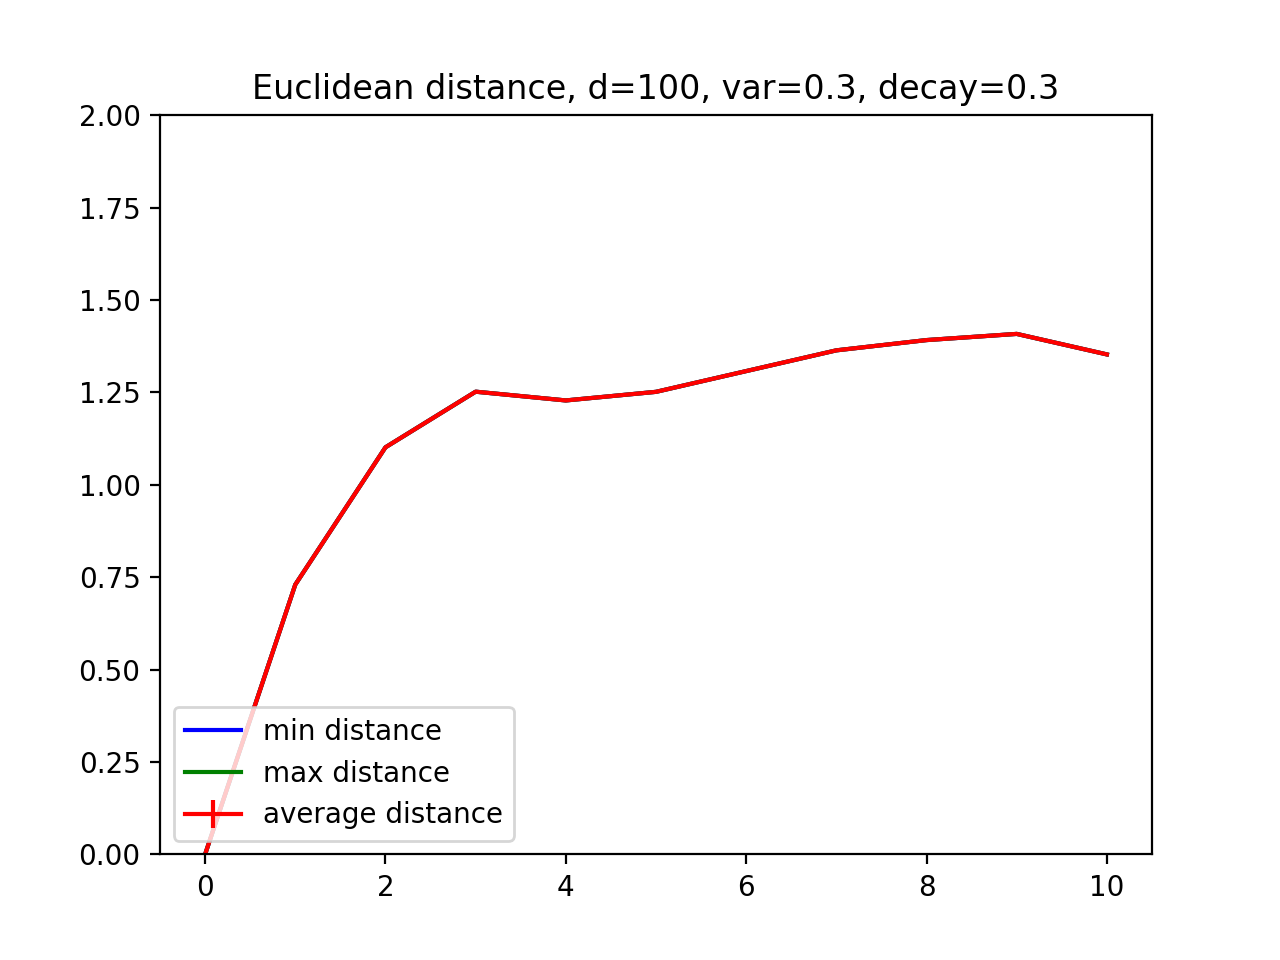

In [591]:
euclidean = True
ctxt = np.load("/Users/maia/Projects/thesis-code/drift_fn_models/gf_integration_normed_noutput=100_v=0.3_beta=0.3_context_vector.npy")
d_intervals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 75, 100, 150, 250, 500, 750, 1000, 1500, 2000, 5000, 10000]
# d_intervals = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]
d_intervals = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10]
n_samples = 1
avg_d, std_d, min_d, max_d = estimate_step_similarity_over_time(ctxt, d_intervals, n_samples=n_samples, euclidean=euclidean)
fig = plt.figure()
ax = fig.add_subplot(111)
label = "Euclidean distance, d=" if euclidean else "Cosine similarity, d="
ax.set_title(label + str(stim_d) + ", var=" + str(var) + ", decay=" + str(decay_rate))
ax.errorbar(d_intervals, avg_d, yerr=std_d, color="red", label="average distance")
ax.plot(d_intervals, min_d, color="blue", label="min distance")
ax.plot(d_intervals, max_d, color="green", label="max distance")
ax.set_ylim(0, 2)
# ax.set_xscale("log")
ax.legend(loc="lower left")
fig.savefig("/Users/maia/Projects/thesis-code/Figures/DriftFns/context_steps_local_e=" + str(euclidean) + "_v=0.3_beta=0.3.png")

In [48]:
def brownian_linear_diffusion():
    # The Wiener process parameter.
    delta = 0.25
    # Total time.
    T = 10.0
    # Number of steps.
    N = 50
    # Time step size
    dt = T / N
    # Initial values of x.
    cdim = 3
    x = np.empty((cdim, N + 1))
    x[:, 0] = 0.0
    brownian(x[:, 0], N, dt, delta, out=x[:, 1:])
    return x

[[ 0.00000000e+00 -1.19335833e-01 -5.17157053e-02 -1.15448954e-01
  -1.71187935e-01 -1.64271276e-01 -2.80989612e-01 -2.30305037e-01
  -3.36263204e-01 -2.45871756e-01 -5.32241393e-01 -4.46777782e-01
  -4.41840103e-01 -4.42820040e-01 -5.15727889e-01 -6.38167401e-01
  -6.43398083e-01 -4.91883365e-01 -5.63873146e-01 -4.10161498e-01
  -6.43373339e-01 -5.81621822e-01 -6.62871768e-01 -4.79334465e-01
  -3.17980235e-01 -2.53686286e-01 -3.18224838e-01 -3.52628651e-01
  -5.48042865e-01 -6.18195020e-01 -7.11974009e-01 -7.69208542e-01
  -7.83649813e-01 -8.70992877e-01 -8.70101906e-01 -7.46742852e-01
  -6.62407898e-01 -5.12591117e-01 -5.72437056e-01 -5.57127827e-01
  -4.71886824e-01 -6.65742559e-01 -7.03032552e-01 -5.89783631e-01
  -4.78182306e-01 -5.41358954e-01 -4.84213058e-01 -2.65793597e-01
  -1.40003978e-01  9.80808293e-02  1.24072266e-01]
 [ 0.00000000e+00  1.23585535e-01  1.63227066e-01  3.40399355e-01
   3.55940323e-01  4.31119693e-01  5.93909006e-01  5.96905031e-01
   4.11122592e-01  3.7069

<IPython.core.display.Javascript object>


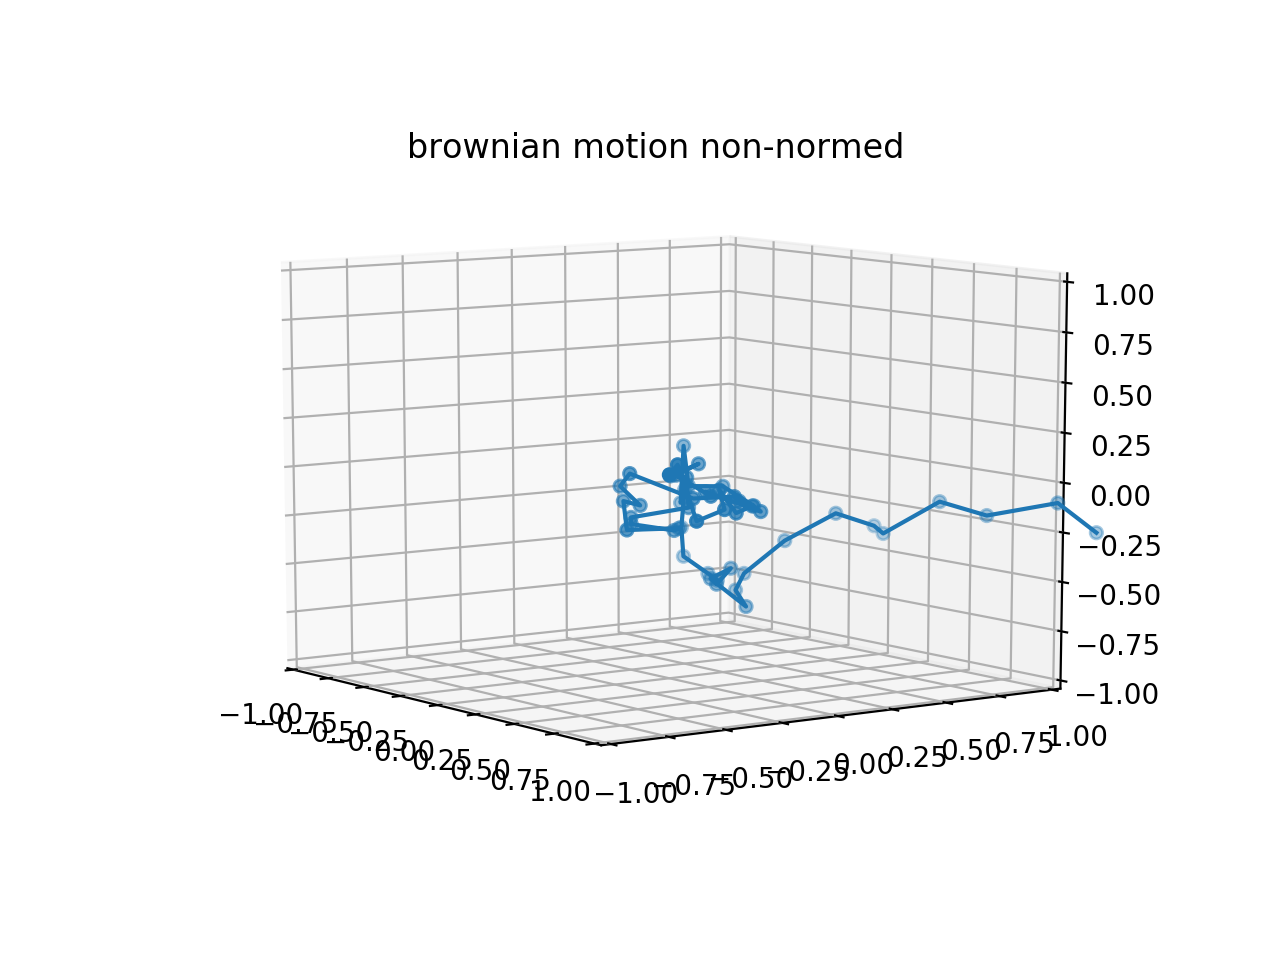

In [49]:
ctxt = brownian_linear_diffusion()
print(ctxt)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("brownian motion non-normed")
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
ax.scatter(ctxt[0], ctxt[1], ctxt[2])
ax.plot(ctxt[0], ctxt[1], ctxt[2])

In [ ]:
def brownian_linear_diffusion():
    # The Wiener process parameter.
    delta = 0.25
    # Total time.
    T = 10.0
    # Number of steps.
    N = 50
    # Time step size
    dt = T / N
    # Initial values of x.
    cdim = 3
    x = np.empty((cdim, N + 1))
    x[:, 0] = 0.0
    brownian(x[:, 0], N, dt, delta, out=x[:, 1:])
    
    return x

ctxt = brownian_linear_diffusion()
print(ctxt)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("brownian motion non-normed")
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
ax.scatter(ctxt[0], ctxt[1], ctxt[2])
ax.plot(ctxt[0], ctxt[1], ctxt[2])

In [94]:
# population = leaky integrator w/ sigmoidal squashing?

def integration_diffusion(n_steps, inhib_rate, inputs, dt=1): 
    ctxt = np.zeros(n_steps)
    for i in range(n_steps - 1): 
        net_input = np.sum(inputs)
        # assuming dt = 1 --- is this problematic?
        a = (1 - inhib_rate) * net_input
        # noise coefficient should be "proportional to the square root of the drift"
        c = np.sqrt((1 + inhib_rate) * net_input)
        b = np.random.normal(0.0, 1.0)
        ctxt[i + 1] = ctxt[i] + a * dt + c * b * np.sqrt(dt)
    return ctxt

def get_inputs(n_neurons): 
    return np.random.normal(0.0, 0.5, size=n_neurons)

def integration_diffusion_context():
    inputs = get_inputs(10)
    return integration_diffusion(20, 0.5, inputs, dt=0.05)

/Users/maia/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


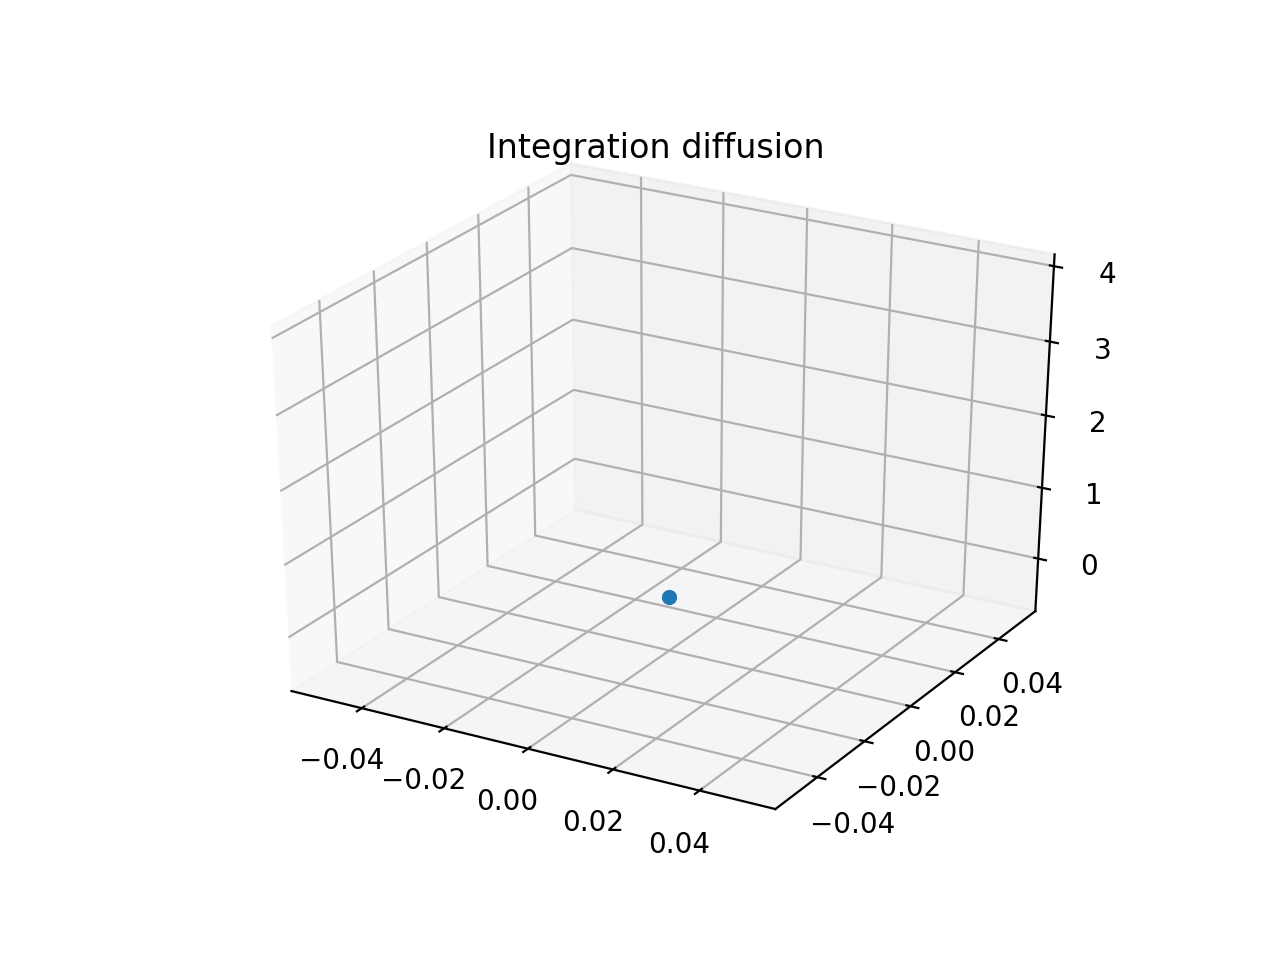

In [95]:
c1 = integration_diffusion_context()
c2 = integration_diffusion_context()
c3 = integration_diffusion_context()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Integration diffusion")
# ax.set_xlim3d(-1, 1)
# ax.set_ylim3d(-1,1)
# ax.set_zlim3d(-1,1)
ax.scatter(c1, c2, c3)
ax.plot(c1, c2, c3)